## Advance Linear Regression


## Housing Price Assignment
###### By M.PHANEESHWAR

### Steps of Execution
- Reading, Understanding and visualising the data
- Preparing the data for modeling (test-train, rescaling etc)
###### Ridge Regression

- Training the model Using Ridge Regression
- Residual Analysis for Ridge Model
- Predictions and Evaluation on the set For Ridge Model
###### Lasso Regression

- Training the model Using Lasso Regression
- Residual Analysis for Lasso Model
- Predictions and Evaluation on the set For Lasso Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('train.csv')

## Step 1: Data Understanding, Cleaning, Visualization

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.shape

(1460, 81)

###### Check if there are any duplicates

In [6]:
df.drop_duplicates(keep = 'first',inplace = True)

In [7]:
df.shape

(1460, 81)

###### To check if there are any missing values

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### Drop the ID variable Because it is a redundant variable

In [9]:
df.drop('Id',inplace = True, axis = 1)

###### Check for the missing values

In [10]:
missing_values = round(100*(df.isnull().sum() / len(df)),2)
missing_cols = list(missing_values[missing_values > 0].index)
missing_values

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [11]:
miss = list(missing_values[missing_values > 50].index)
print(miss)
df.drop(miss,inplace = True,axis = 1)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


###### Print all Categorical and Numerical Variables in the data set

In [12]:
Categorical = list(df.select_dtypes(include = 'object').columns)
Numerical = list(df.select_dtypes(exclude = 'object').columns)
print('categorical',':',Categorical)
print('numerical',':',Numerical)

categorical : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
numerical : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

In [13]:
missing_values = round(100*(df.isnull().sum() / len(df)),2)
missing_values

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

##### Impute the missing Values For Categorical Variables

In [14]:
missing_cat = [i for i in Categorical if i in missing_cols ]
missing_num = [i for i in Numerical if i in missing_cols ]

In [15]:
df[missing_cat] = df[missing_cat].fillna('None')

###### Impute the missing values for Numerical Variables

In [16]:
for i in missing_num:
    a =  df[i].median()
    df[i] = df[i].fillna(a)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
missing_values = round(100*(df.isnull().sum() / len(df)),2)
missing_values[missing_values > 0]

Series([], dtype: float64)

###### To check if there is any duplicates within the variables for categorical data

In [20]:
for i in Categorical:
    print(i,':',df[i].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'Meta

###### Converting the few features from int to categorical

In [21]:
Dict = {1:'VeryPoor',2:'Poor',3:'Fair',4:'BelowAverage',5:'Average',6:'AboveAverage',7:'Good',8:'Very Good',9:'Excellent',10:'VeryExcellent'}

In [22]:
df.OverallQual = df.OverallQual.map(Dict)
df.OverallCond = df.OverallCond.map(Dict)

In [23]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [24]:
Dict1 = {20:'MSSubClass20',30:'MSSubClass30',40:'MSSubClass40',45:'MSSubClass45',50:'MSSubClass50',60:'MSSubClass60',70:'MSSubClass70',75:'MSSubClass75',80:'MSSubClass80',85:'MSSubClass85',90:'MSSubClass90',120:'MSSubClass120',150:'MSSubClass150',160:'MSSubClass160',180:'MSSubClass180',190:'MSSubClass190'}
df['MSSubClass'] = df['MSSubClass'].map(Dict1)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,MSSubClass60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,MSSubClass20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,AboveAverage,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,MSSubClass60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,MSSubClass70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,MSSubClass60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### Feature Engineering
###### Find the Duaration of the house and the Garage

In [26]:
def House_Years(x):
    if (x.YearRemodAdd == x.YearBuilt):
        return x.YrSold - x.YearBuilt
    else:
        return x.YrSold - x.YearRemodAdd
df['House_Years'] = df.apply(House_Years,axis = 1)

In [27]:
def Garage_Years(x):
    return x.YrSold - x.GarageYrBlt
df['Garage_Years'] = df.apply(Garage_Years,axis = 1)

In [28]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1

### Perform EDA Analysis

###### Pair Plots of the Numerical Data

In [30]:
Numerical = list(df.select_dtypes(exclude = 'object').columns)

<Figure size 864x720 with 0 Axes>

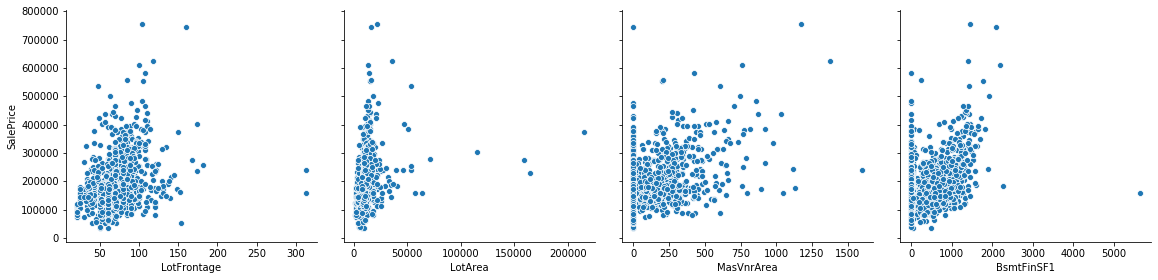

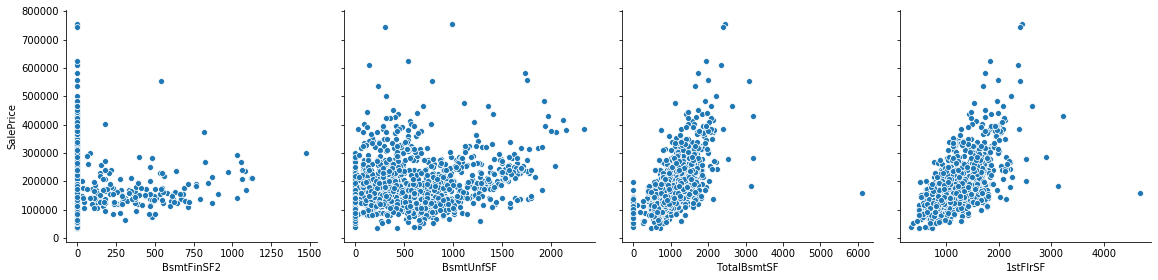

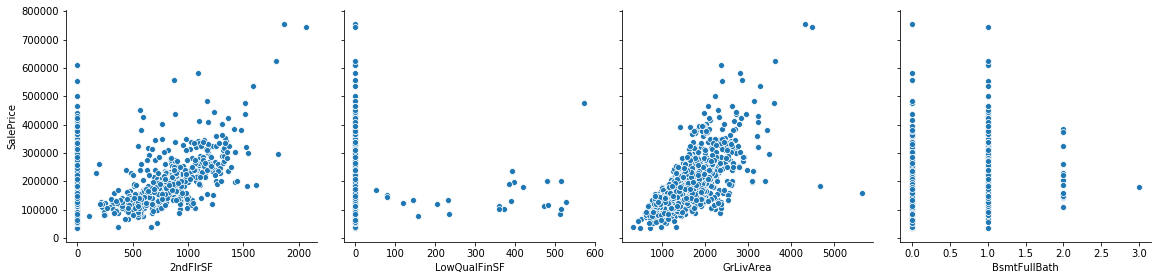

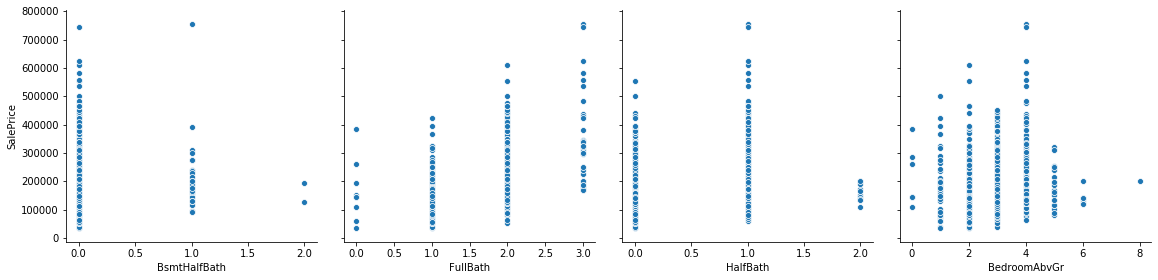

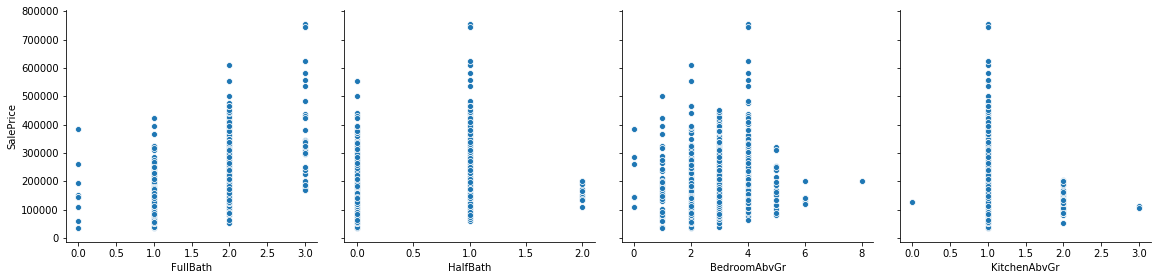

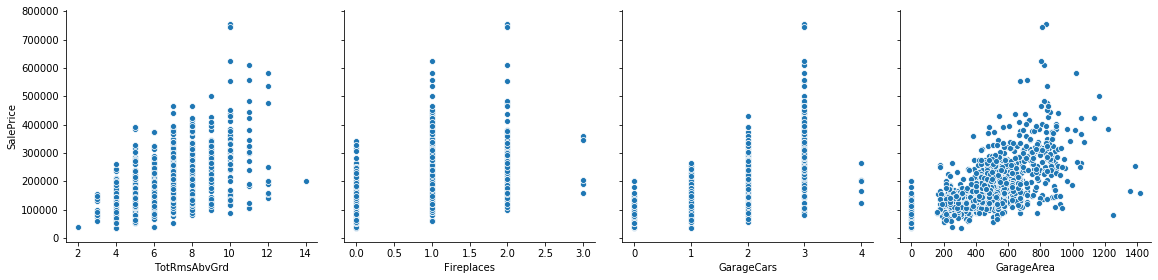

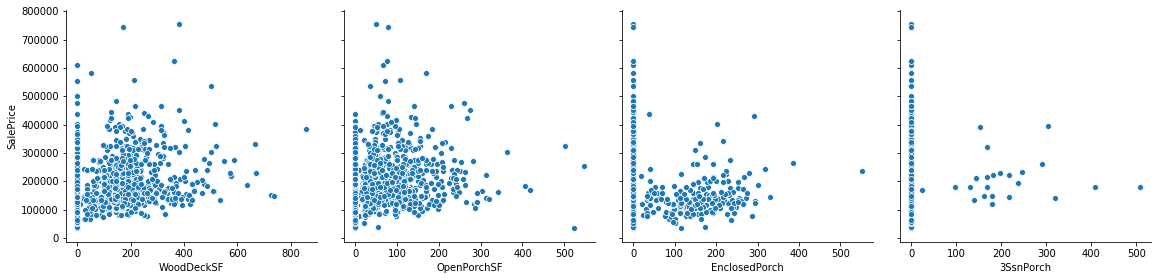

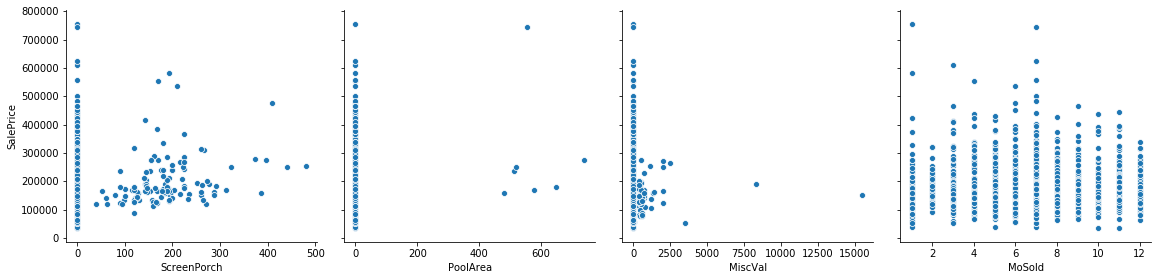

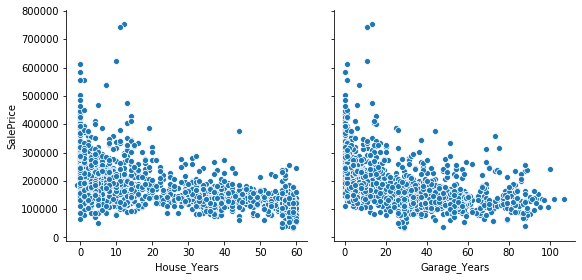

In [31]:
plt.figure(figsize=(12,10))
sns.pairplot(df, x_vars= [Numerical[0],Numerical[1],Numerical[2],Numerical[3]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[4],Numerical[5],Numerical[6],Numerical[7]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[8],Numerical[9],Numerical[10],Numerical[11]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[12],Numerical[13],Numerical[14],Numerical[15]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[13],Numerical[14],Numerical[15],Numerical[16]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[17],Numerical[18],Numerical[19],Numerical[20]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[21],Numerical[22],Numerical[23],Numerical[24]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[25],Numerical[26],Numerical[27],Numerical[28]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars= [Numerical[30],Numerical[31]], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [32]:
Numerical.remove('SalePrice')
df[Numerical]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,House_Years,Garage_Years
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,5.0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,31.0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,6,7.0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,36,8.0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,7,8.0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,22,32.0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,4,69.0
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,14,60.0


###### Box plot of the Numerical Data to understand the spread of the data and Outliers that lie within the features of the dataset

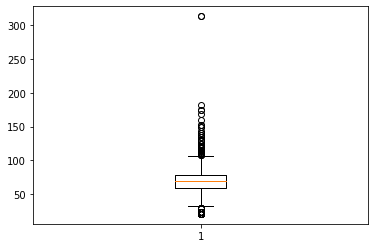

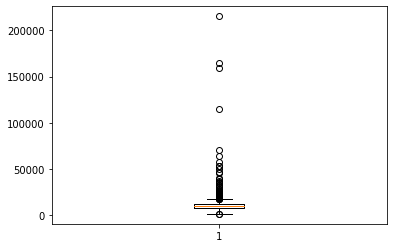

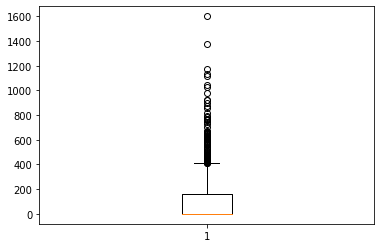

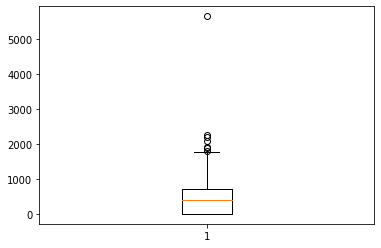

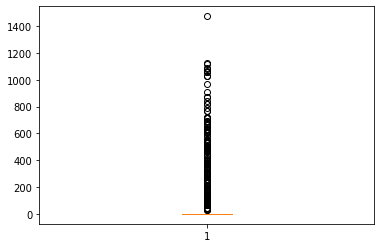

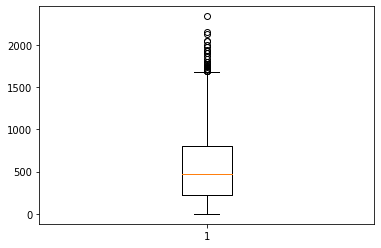

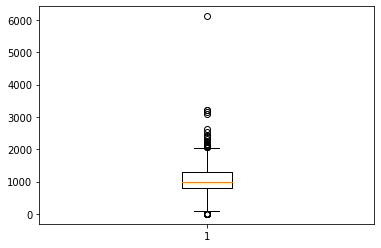

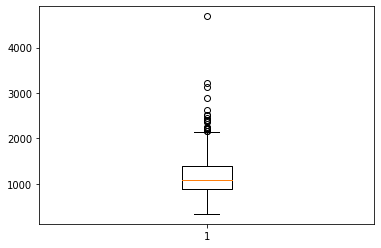

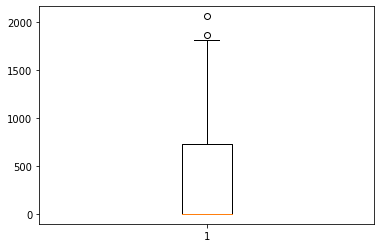

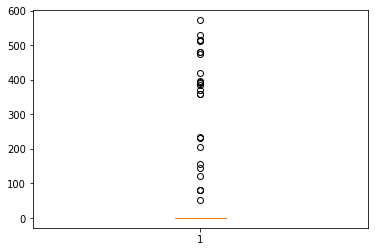

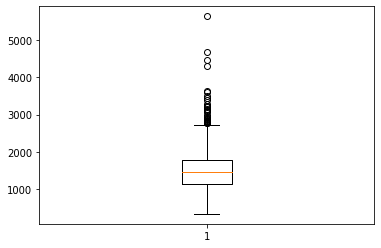

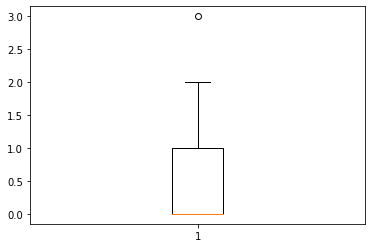

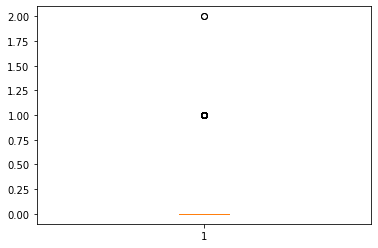

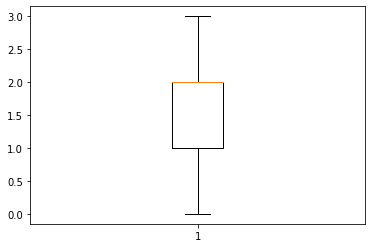

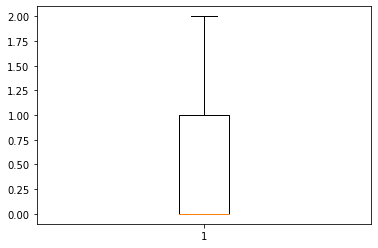

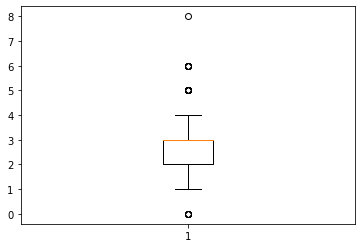

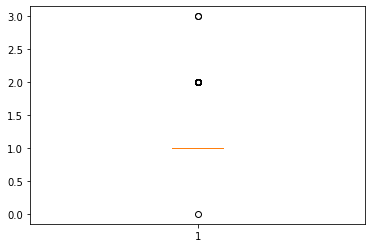

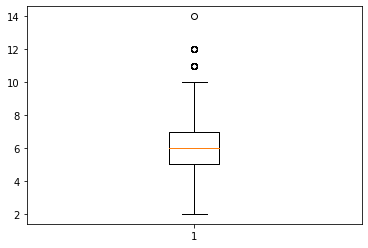

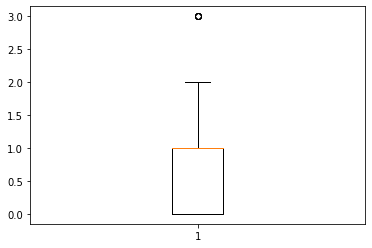

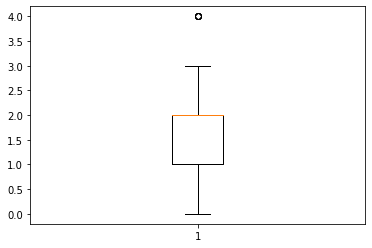

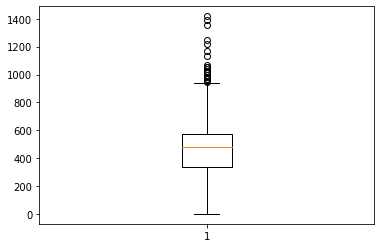

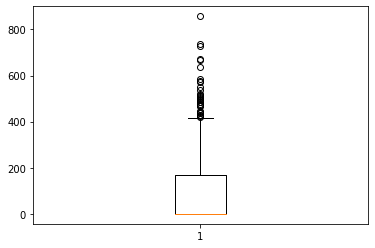

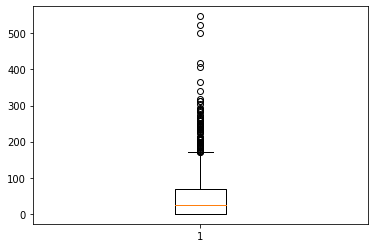

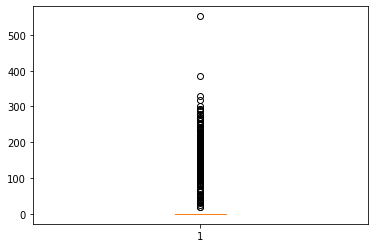

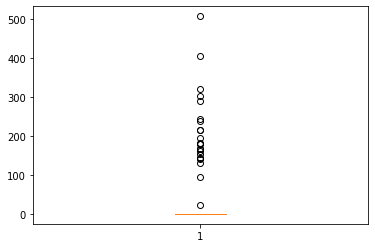

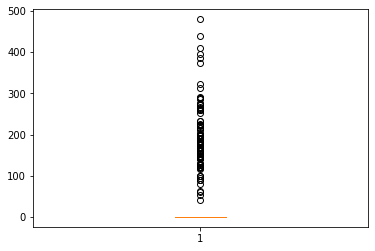

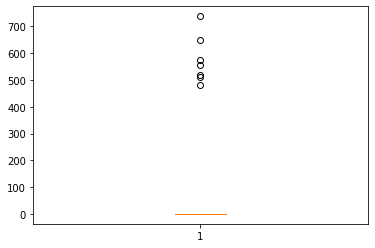

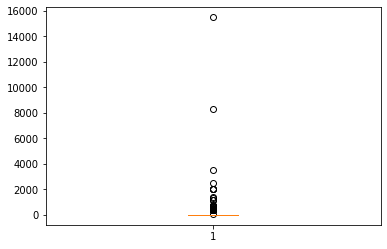

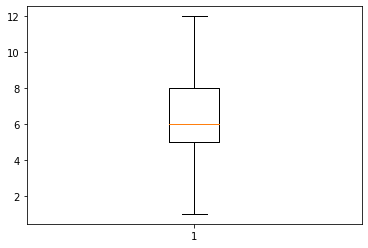

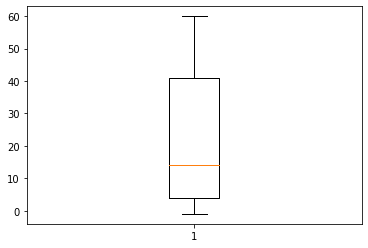

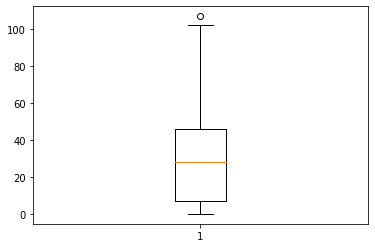

In [33]:
for i in Numerical:
    plt.boxplot(df[i])
    plt.show()

###### Exclude the datapoints that are beyond 95th percentile and below 5th percentile

In [34]:
for i in Numerical:
    Q1 = df[i].quantile(0.05)
    Q2 = df[i].quantile(0.95)
    IQR = Q2 - Q1

    df = df[~(((df[i]) < (Q1 - 2.5 * IQR)) | ((df[i]) > (Q2 + 2.5 * IQR)))]


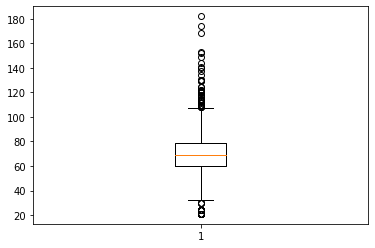

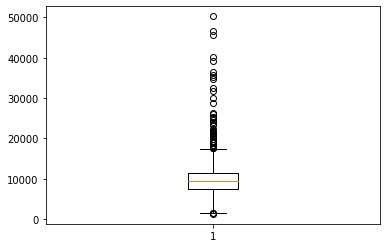

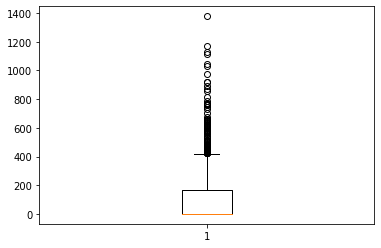

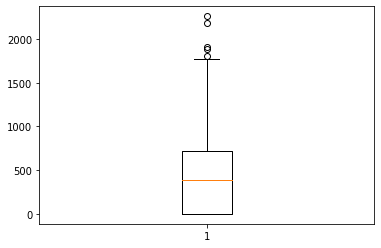

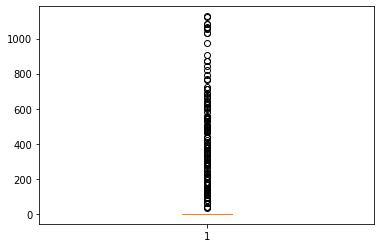

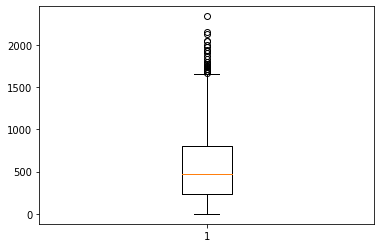

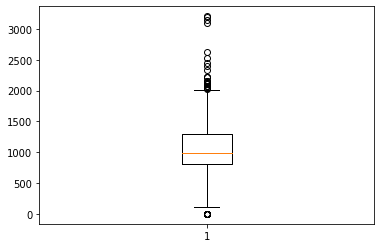

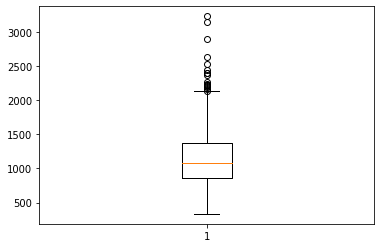

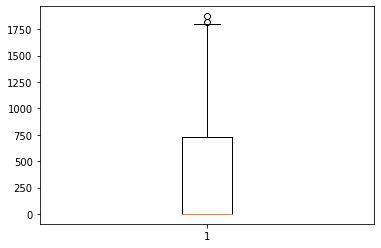

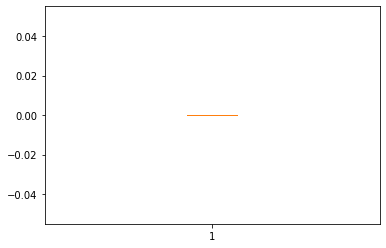

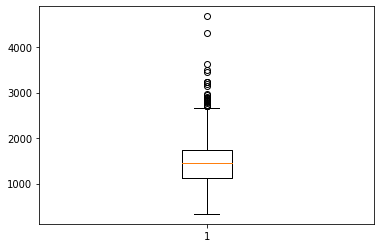

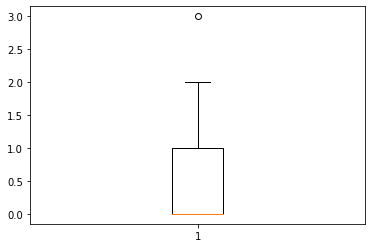

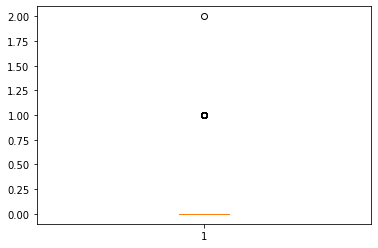

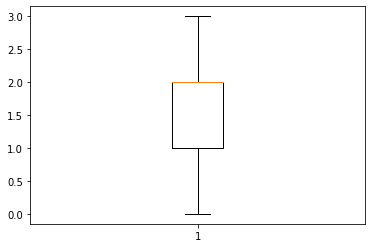

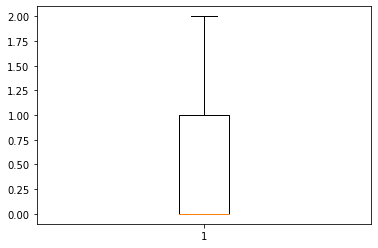

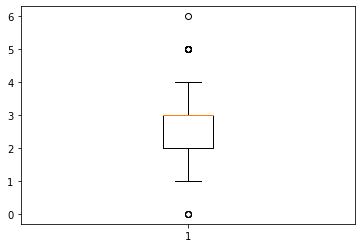

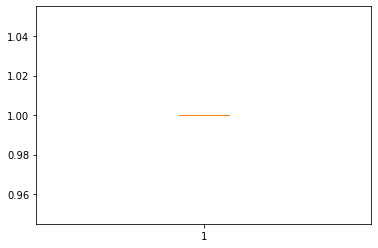

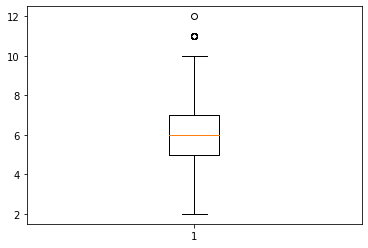

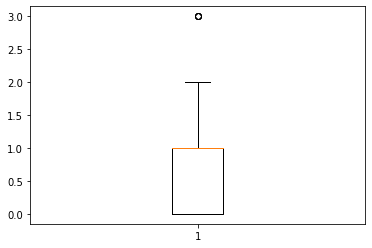

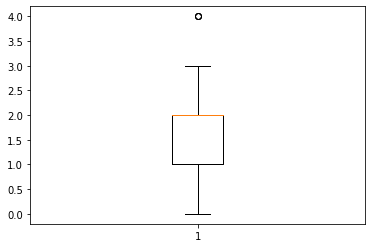

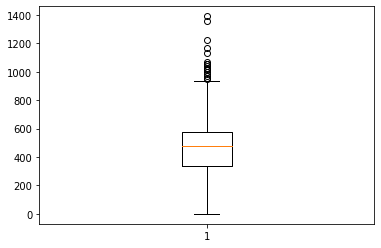

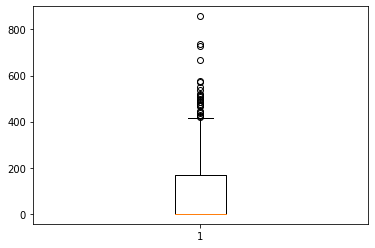

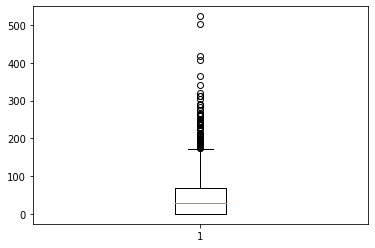

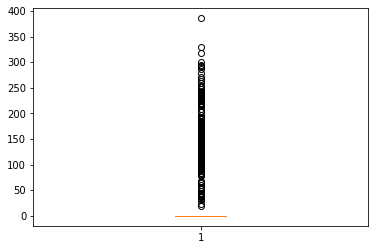

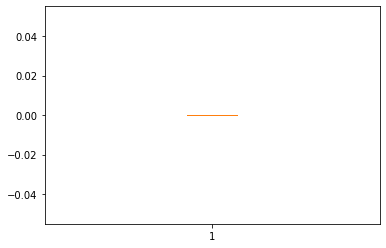

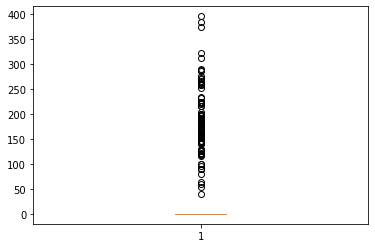

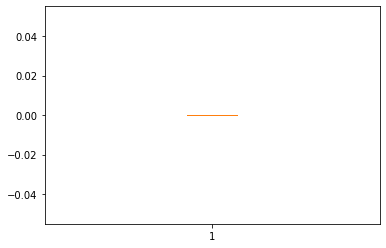

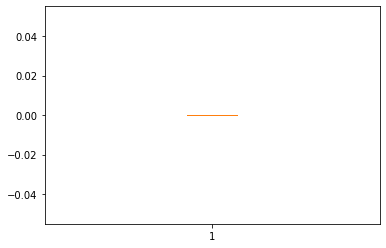

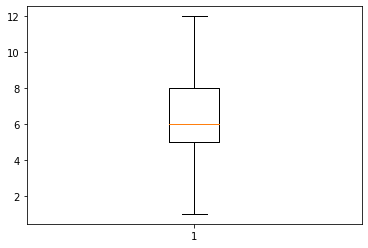

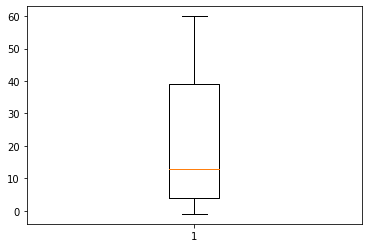

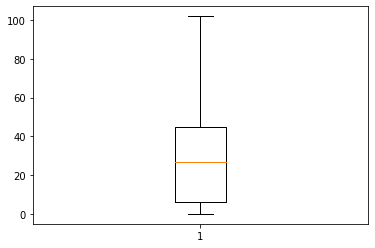

In [35]:
for i in Numerical:
    plt.boxplot(df[i])
    plt.show()

##### To Check remaining data left after dropping few samples

In [36]:
num_data = round(100*(len(df)/1460),2)
print(num_data)

87.95


In [37]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,House_Years,Garage_Years
0,MSSubClass60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,5,5.0
1,MSSubClass20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,AboveAverage,Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,31,31.0
2,MSSubClass60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,6,7.0
3,MSSubClass70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,36,8.0
4,MSSubClass60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,8,8.0


###### To delete those variables that have only one value

In [38]:
x = list(df.loc[:,df.nunique() == 1].columns)
print(x)
df.drop(x,inplace = True,axis = 1)

['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


##### More than 95% of the samples under these features are dominated by one type of category, Hence we delete those features

In [39]:
y = list(df.loc[:,df.nunique() == 2].columns) 
print(y)
df.drop(y,inplace = True, axis = 1)

['Street', 'Utilities', 'CentralAir']


In [40]:
df.shape

(1284, 66)

In [41]:
Categorical = list(df.select_dtypes(include = 'object').columns)
len(Categorical)

39

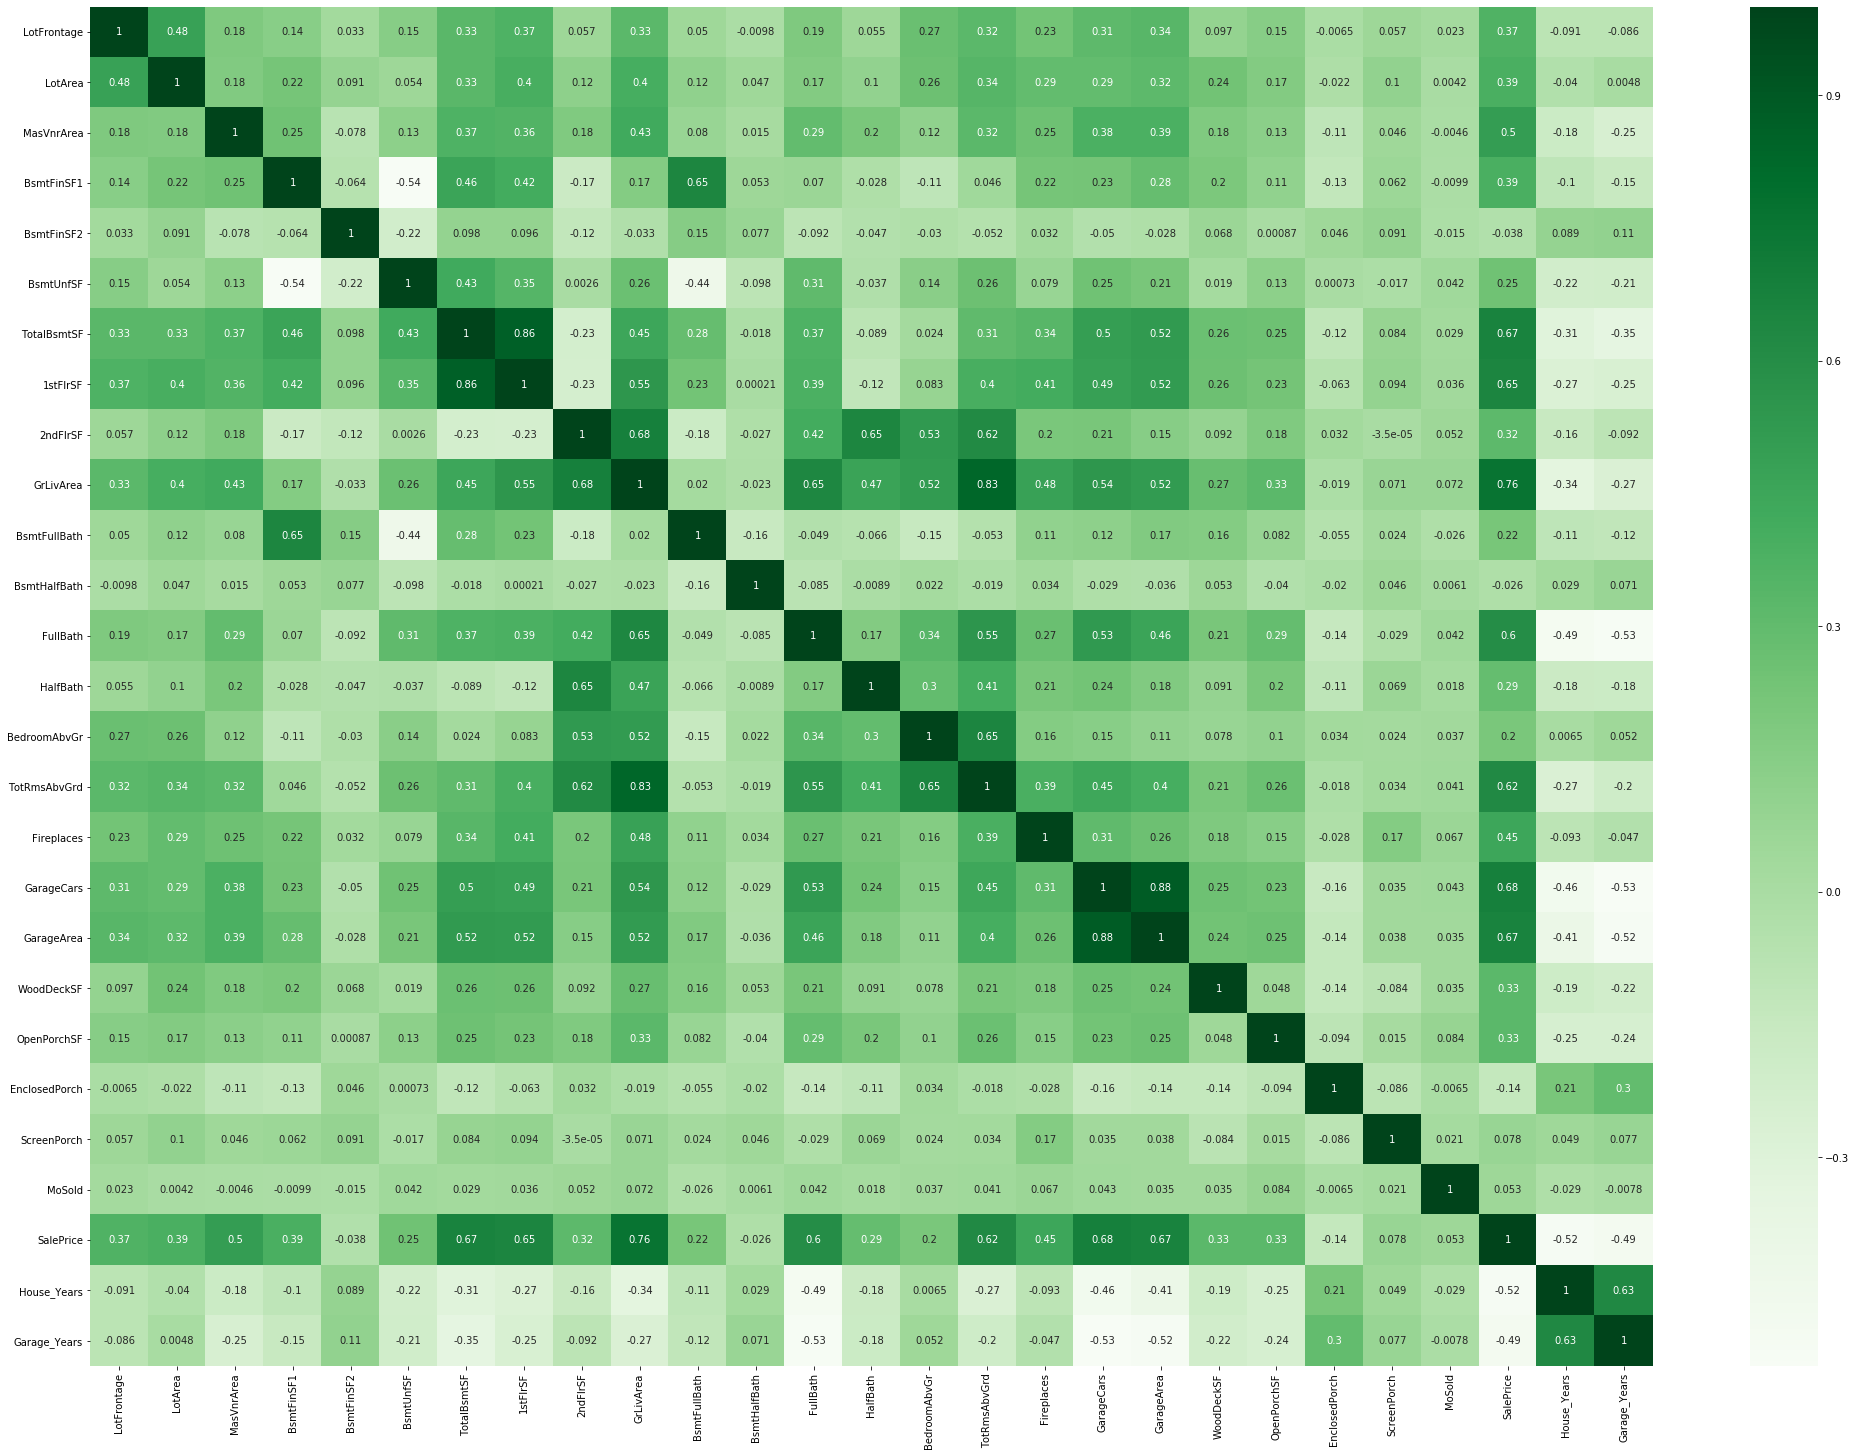

In [42]:
plt.subplots(figsize = (35,25))
sns.heatmap(df.corr(),annot = True, cmap = 'Greens')
plt.show()

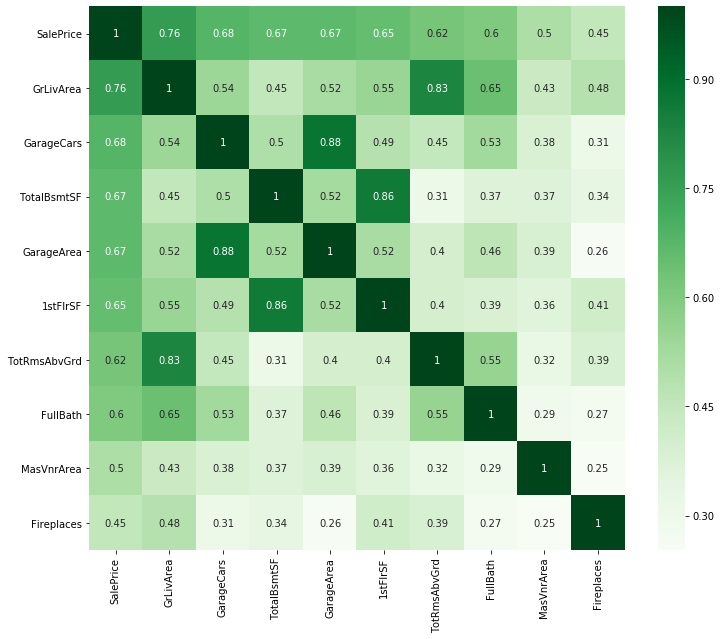

In [43]:
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
plt.subplots(figsize = (12,10))
sns.heatmap(df[cols].corr(),annot = True, cmap = 'Greens')
plt.show()

###### The Function below is used to add the values at the top og=f the barplot or Countplot ,
###### While the CategoricalPlot is used to plot count plots and Box plots for every categorical data  against the response variable

In [44]:
def add_value_labels_plots(ax,size,spacing=5):
    
    plt.yticks(fontsize=size)
    plt.xticks(fontsize=size)
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',fontsize=size,                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



def CategoricalPlot(var1,axsize1 = 10, spacing1 = 15, axsize2 = 10,spacing2 = 29):
    
    plt.subplots(figsize = (12,10))
    plt.subplot(2,2,1)
    plt.title('Count_Plot of' + var1)
    ax1 = sns.countplot(df[var1], palette=('husl'))
    add_value_labels_plots(ax1,axsize1,spacing = spacing1)
    ax1.set(xlabel = '%s'%var1, ylabel = 'Count of' + '%s'%var1)
    
    plt.subplot(2,2,2)
    plt.title('Box_Plot')
    ax = sns.boxplot(x = df[var1],y = df.SalePrice)
    add_value_labels_plots(ax,axsize2,spacing = spacing2)
    
    plt.show()

In [45]:
df.shape

(1284, 66)

In [46]:
x = ['MSZoning', 'LotShape', 'LandContour', 'FireplaceQu', 'GarageType', 'GarageCond', 'FireplaceQu', 'BsmtQual',
 'BsmtCond','OverallCond','HeatingQC','SaleCondition','HouseStyle','Neighborhood']

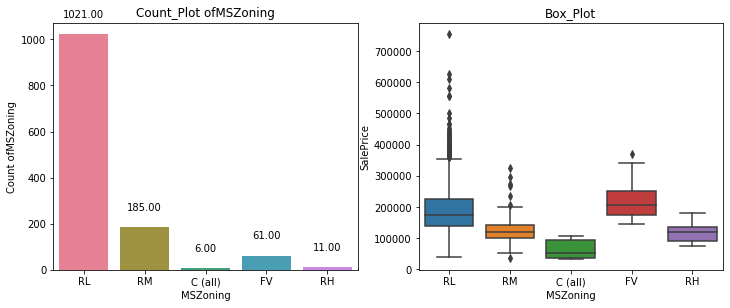

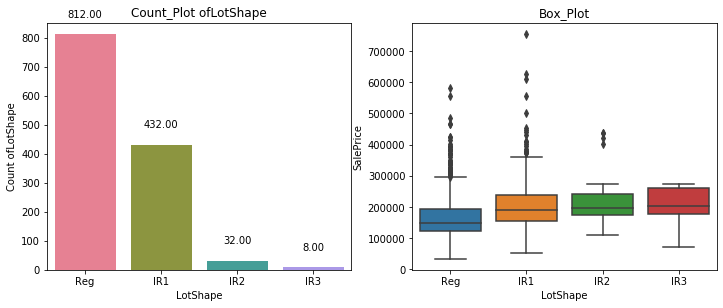

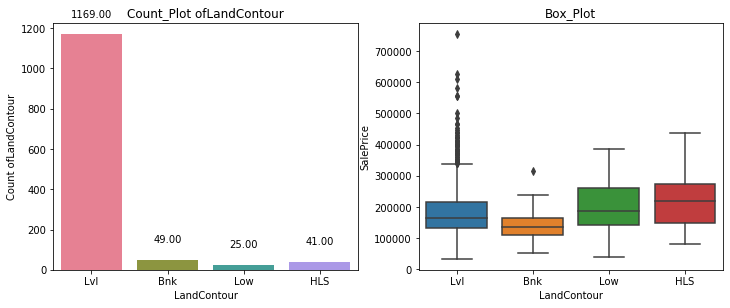

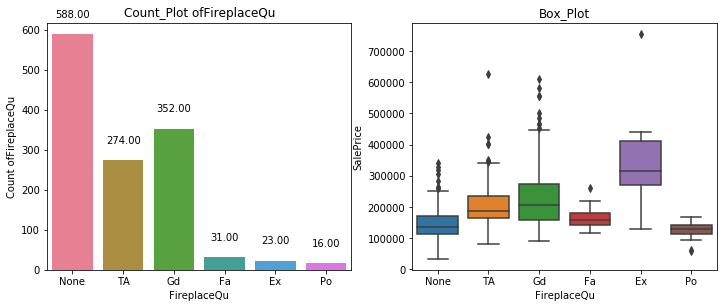

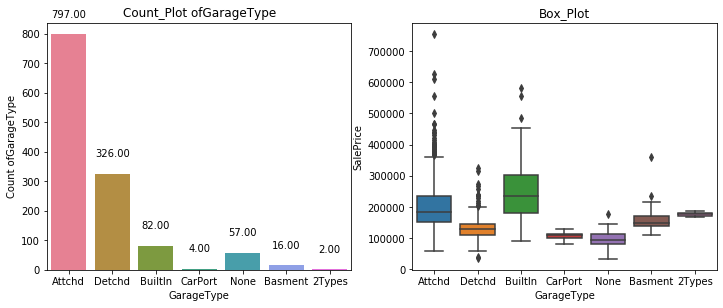

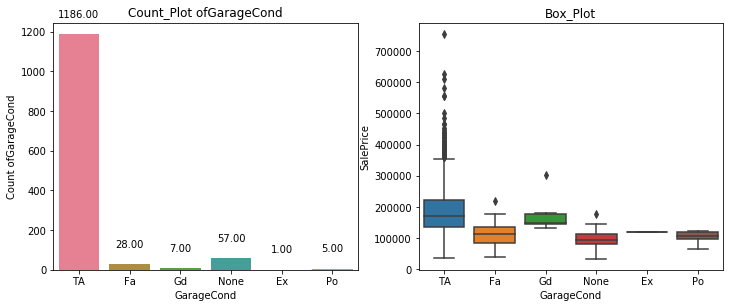

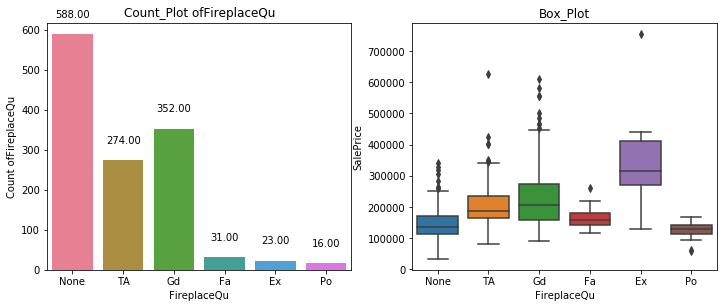

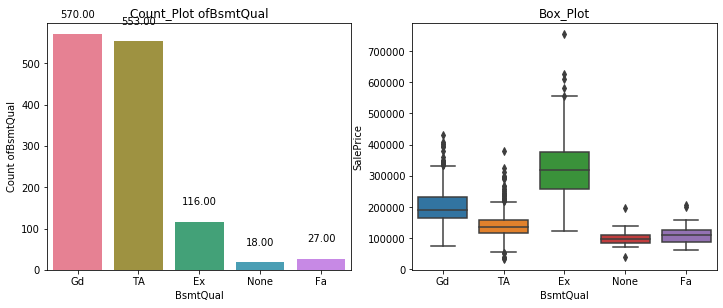

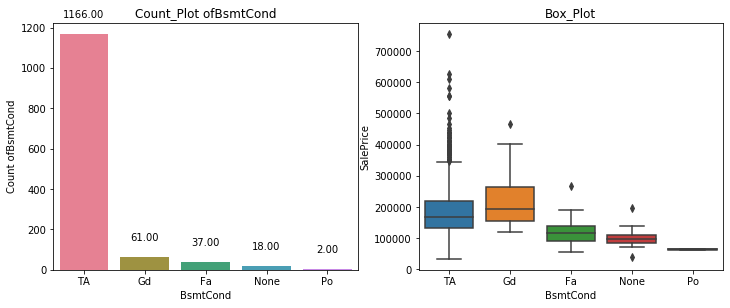

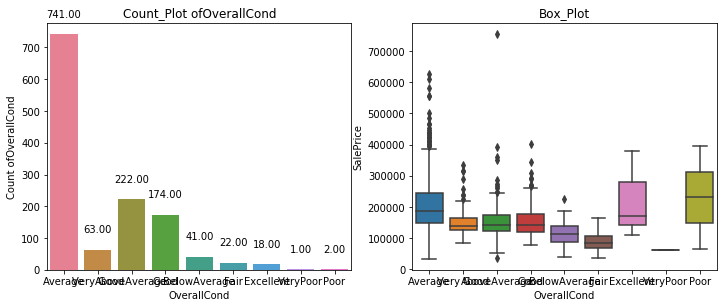

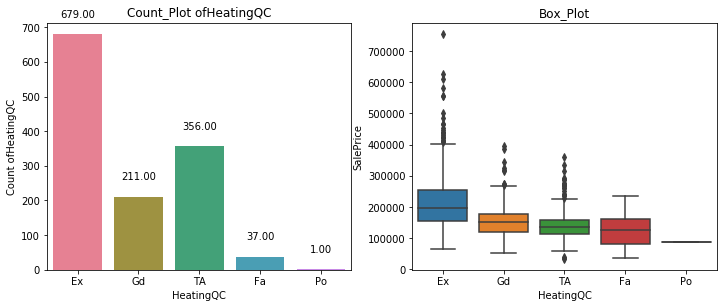

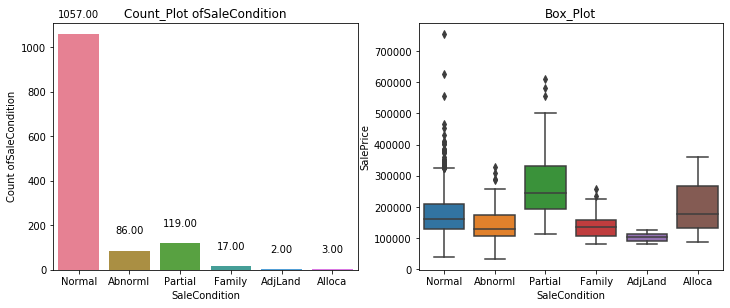

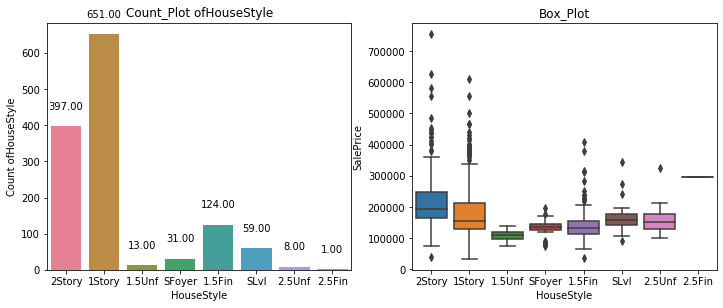

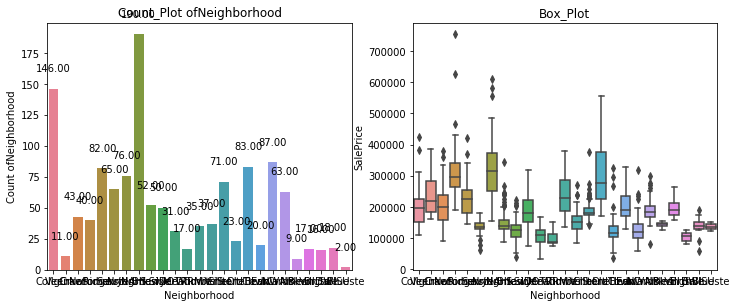

In [47]:
for i in x:
    CategoricalPlot(i,axsize1 = 10, spacing1 = 15, axsize2 = 10,spacing2 = 29)

##### Check for the Skew Data

In [48]:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [49]:
Numerical = list(df.select_dtypes(exclude='object').columns)
Numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'SalePrice',
 'House_Years',
 'Garage_Years']

###### Check the skew of all numerical features

In [50]:
skew = df[Numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\n Skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skew})
skewness


 Skew in numerical features: 



,Skew
BsmtHalfBath,4.151382
BsmtFinSF2,4.041762
ScreenPorch,3.746191
EnclosedPorch,2.950985
LotArea,2.582570
MasVnrArea,2.476265
OpenPorchSF,2.252653
SalePrice,1.701843
WoodDeckSF,1.477594
GrLivArea,1.051383


In [51]:
skew_col = list(skewness.index)
skew_col

['BsmtHalfBath',
 'BsmtFinSF2',
 'ScreenPorch',
 'EnclosedPorch',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'WoodDeckSF',
 'GrLivArea',
 '1stFlrSF',
 'BsmtUnfSF',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'Garage_Years',
 'LotFrontage',
 'Fireplaces',
 'House_Years',
 'HalfBath',
 'TotRmsAbvGrd',
 'BsmtFullBath',
 'MoSold',
 'GarageArea',
 'FullBath',
 'BedroomAbvGr',
 'GarageCars']

###### Visualize the Skew data using histrograms

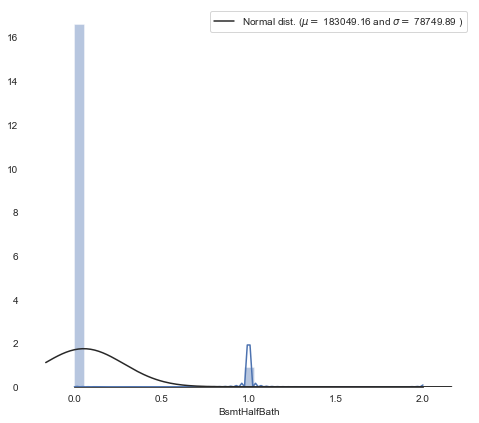

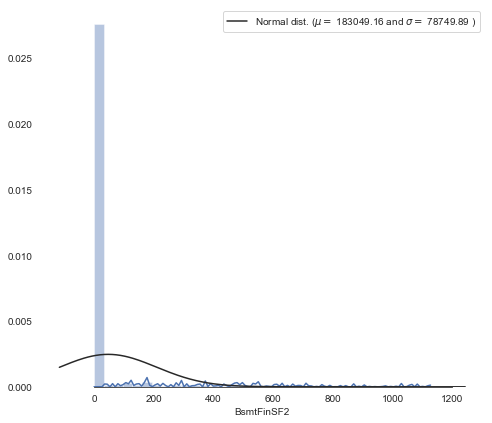

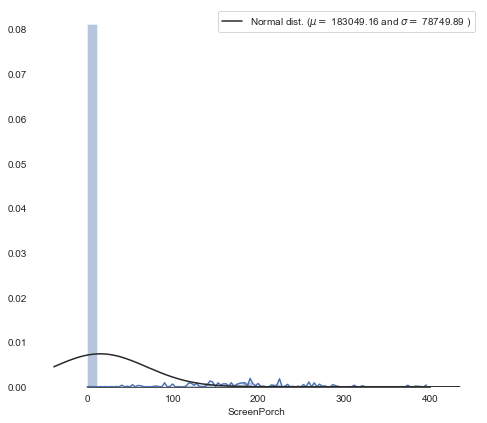

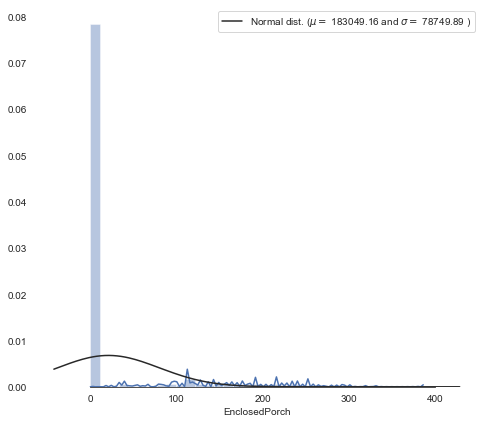

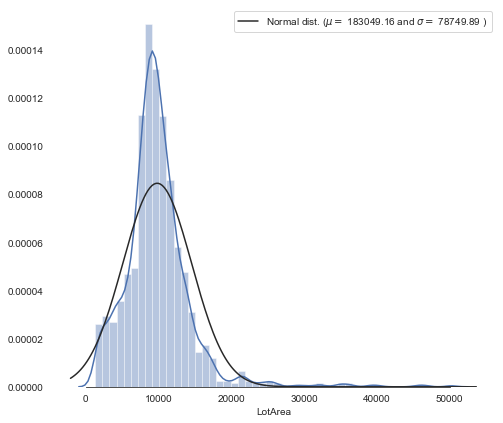

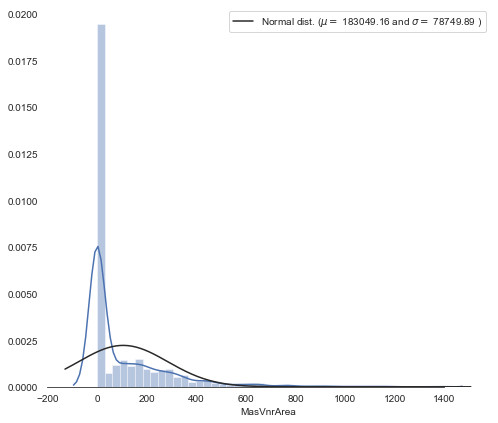

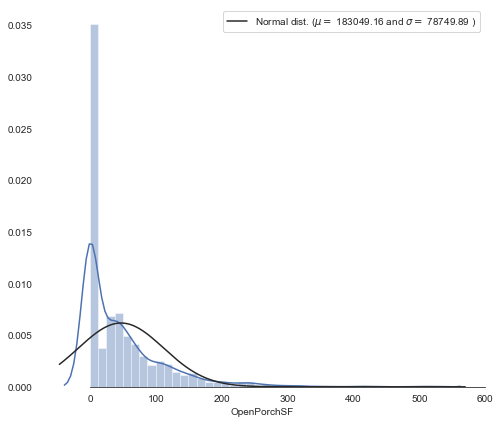

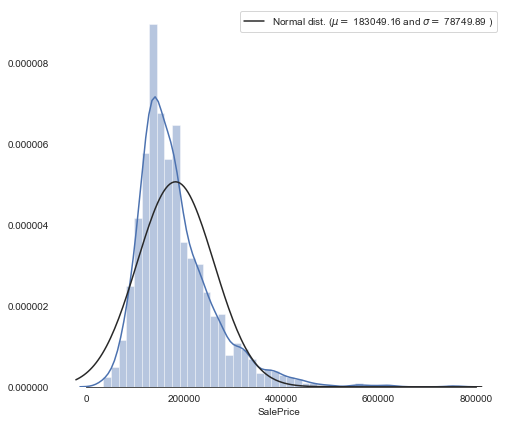

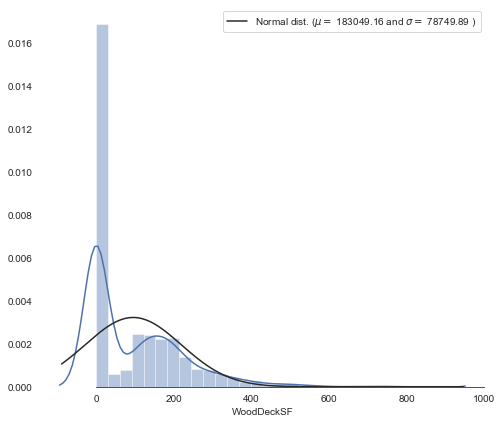

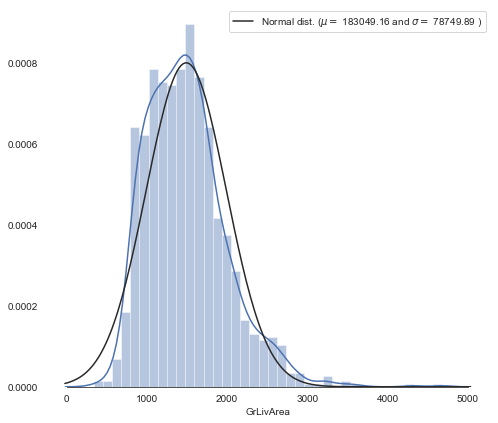

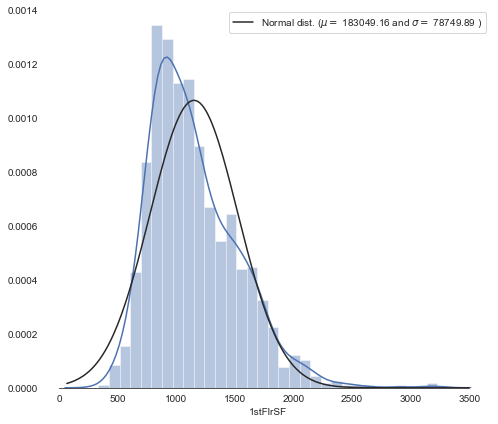

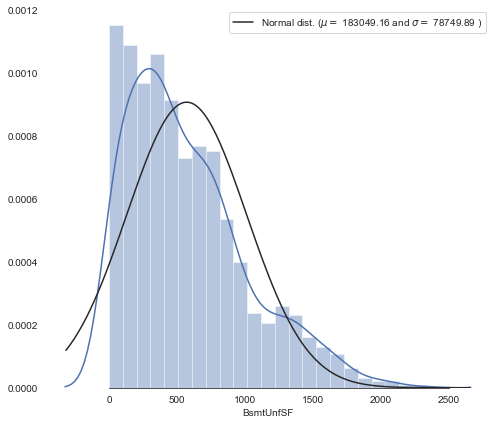

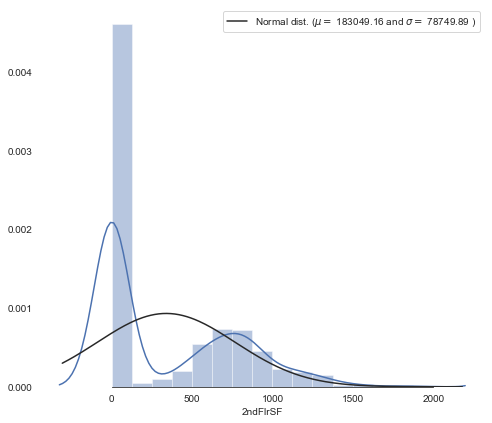

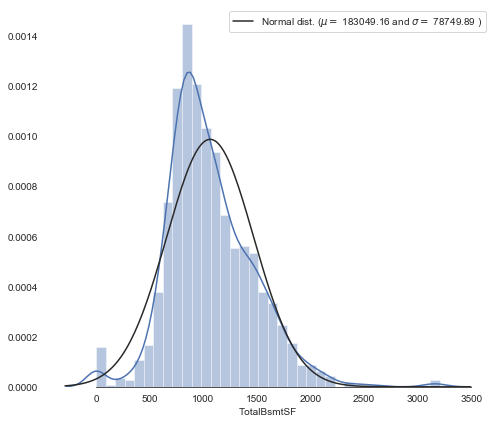

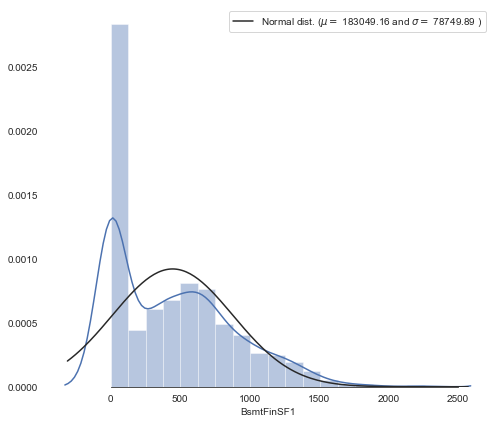

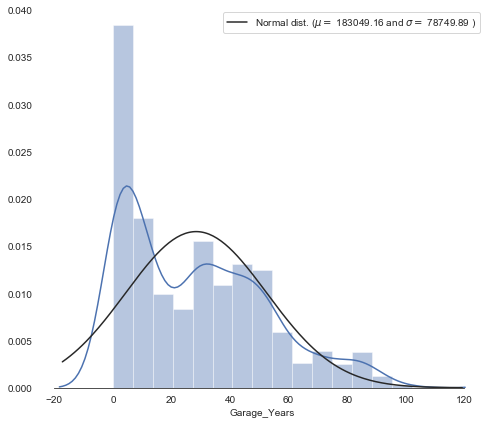

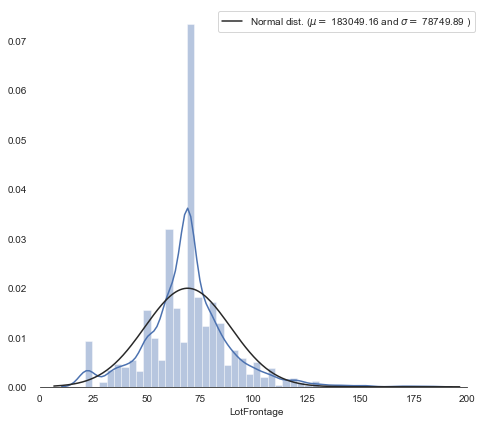

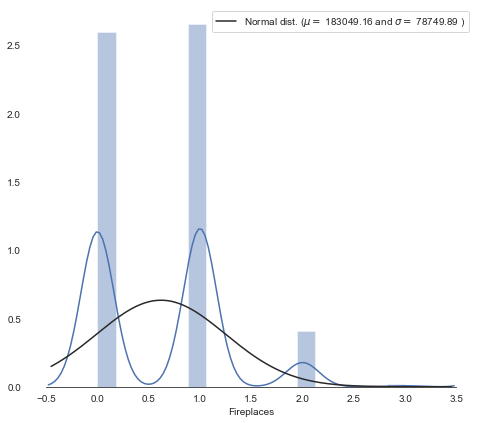

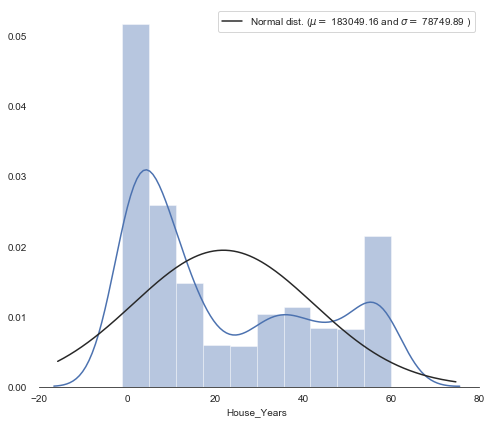

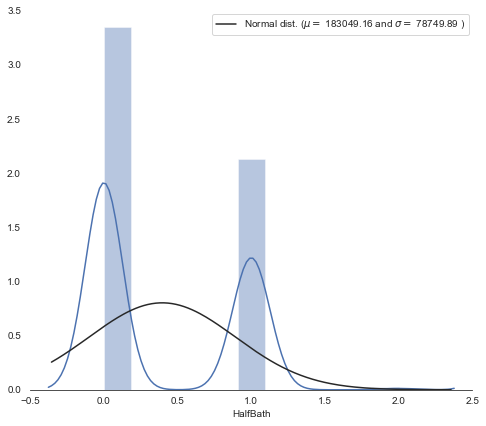

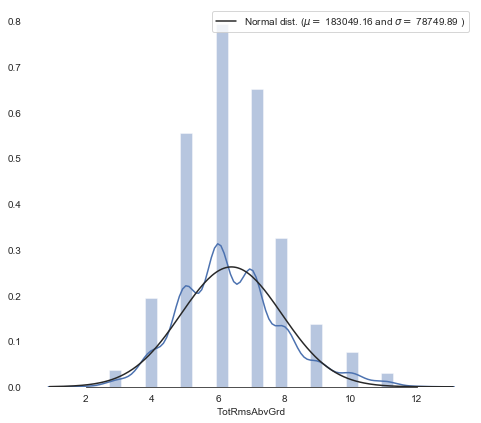

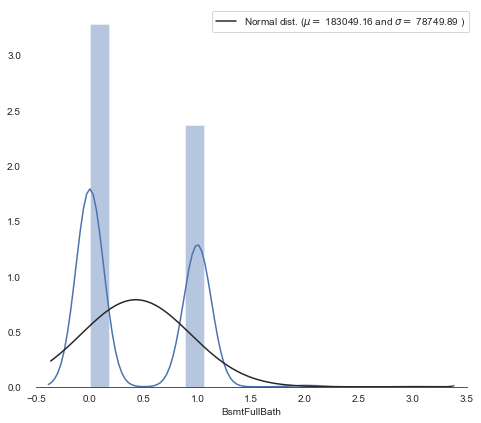

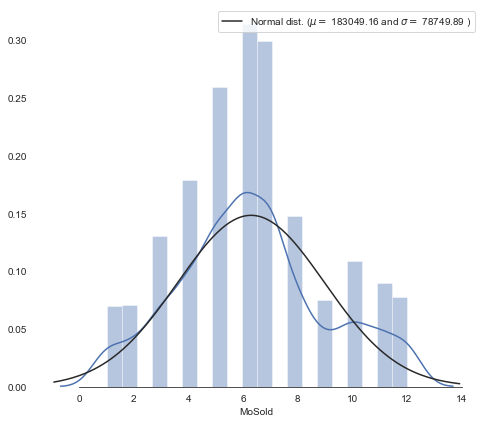

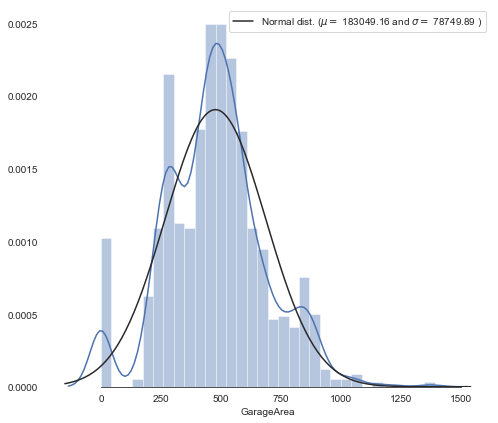

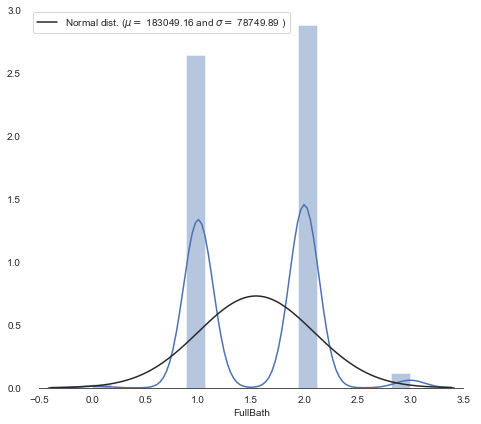

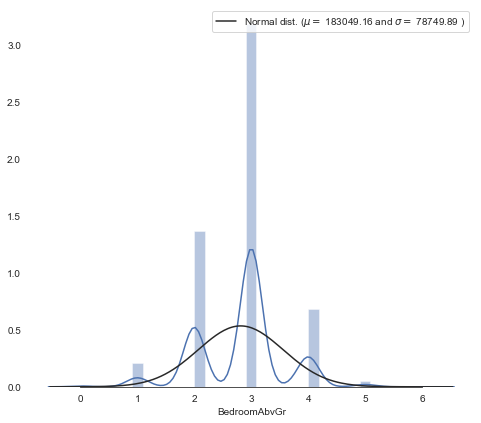

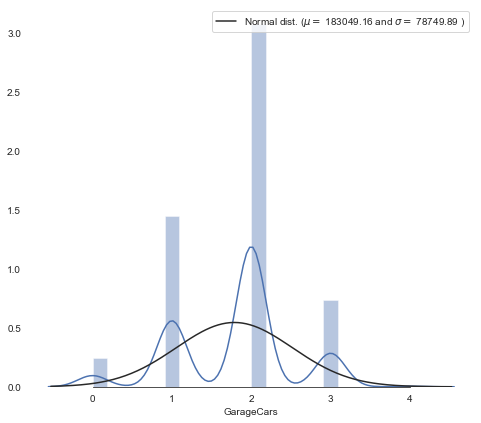

In [52]:
for i in skew_col:
    
    sns.set_style("white")
    sns.set_color_codes(palette='deep')
    f, ax = plt.subplots(figsize=(8, 7))
    #Check the new distribution 
    sns.distplot(df[i],fit = norm, color="b");
    (mu, sigma) = norm.fit(df['SalePrice'])
    #print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    ax.xaxis.grid(False)
    sns.despine(trim=True, left=True)
    plt.show()

###### Remove the skewness of of Numerical independent variables

In [53]:
skewness = skewness[abs(skewness) > 0.75]
print((skewness.shape[0]))
skewed_features = skewness.index
for i in skewed_features:
     df[i] = boxcox1p(df[i], 0.15)

27



 mu = 33.96 and sigma = 2.44



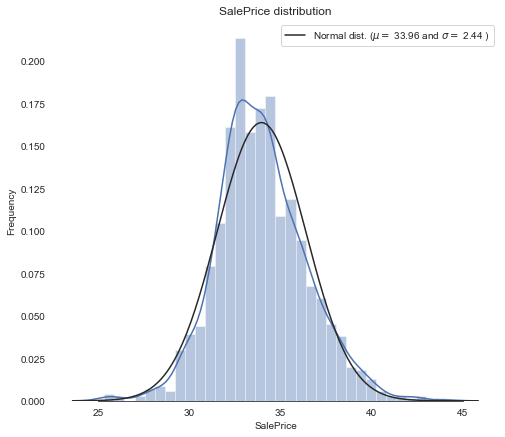

In [54]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['SalePrice'],fit = norm, color="b");

(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

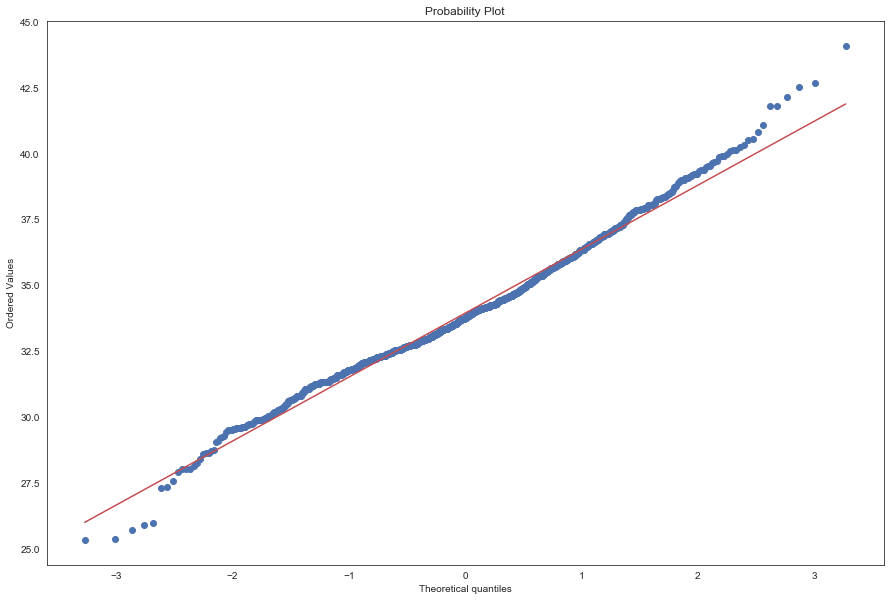

In [55]:
plt.subplots(figsize = (15,10))
x = stats.probplot(df['SalePrice'], plot=plt)   
plt.show()

###### Convert the categorical data into Dummy Variables

In [56]:
Categorical = list(df.select_dtypes(include = 'object').columns)
Numerical = list(df.select_dtypes(exclude = 'object').columns)
print(df.shape)
print(len(Categorical))
print(len(Numerical))

(1284, 66)
39
27


In [57]:
dummies = pd.get_dummies(df[Categorical],drop_first = True)
df = pd.concat([df,dummies],axis = 1)
df.drop(Categorical,inplace = True, axis = 1)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,House_Years,Garage_Years,MSSubClass_MSSubClass160,MSSubClass_MSSubClass180,MSSubClass_MSSubClass190,MSSubClass_MSSubClass20,MSSubClass_MSSubClass30,MSSubClass_MSSubClass40,MSSubClass_MSSubClass45,MSSubClass_MSSubClass50,MSSubClass_MSSubClass60,MSSubClass_MSSubClass70,MSSubClass_MSSubClass75,MSSubClass_MSSubClass80,MSSubClass_MSSubClass85,MSSubClass_MSSubClass90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_BelowAverage,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Good,OverallQual_VeryExcellent,OverallQual_VeryPoor,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual

In [58]:
df.shape

(1284, 258)

## Step 2: Preparing the Data for Modeling (test-train, rescaling etc)

In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
df_train, df_test = train_test_split(df, random_state = 100, train_size = 0.7, test_size = 0.3)

In [61]:
df_train

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,House_Years,Garage_Years,MSSubClass_MSSubClass160,MSSubClass_MSSubClass180,MSSubClass_MSSubClass190,MSSubClass_MSSubClass20,MSSubClass_MSSubClass30,MSSubClass_MSSubClass40,MSSubClass_MSSubClass45,MSSubClass_MSSubClass50,MSSubClass_MSSubClass60,MSSubClass_MSSubClass70,MSSubClass_MSSubClass75,MSSubClass_MSSubClass80,MSSubClass_MSSubClass85,MSSubClass_MSSubClass90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_BelowAverage,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Good,OverallQual_VeryExcellent,OverallQual_VeryPoor,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual

###### Rescaling the values

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[Numerical] = scaler.fit_transform(df_train[Numerical])

In [63]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,House_Years,Garage_Years,MSSubClass_MSSubClass160,MSSubClass_MSSubClass180,MSSubClass_MSSubClass190,MSSubClass_MSSubClass20,MSSubClass_MSSubClass30,MSSubClass_MSSubClass40,MSSubClass_MSSubClass45,MSSubClass_MSSubClass50,MSSubClass_MSSubClass60,MSSubClass_MSSubClass70,MSSubClass_MSSubClass75,MSSubClass_MSSubClass80,MSSubClass_MSSubClass85,MSSubClass_MSSubClass90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_BelowAverage,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Good,OverallQual_VeryExcellent,OverallQual_VeryPoor,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual

## Step 3: Building the Model

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [65]:
len(df_train.columns)

258

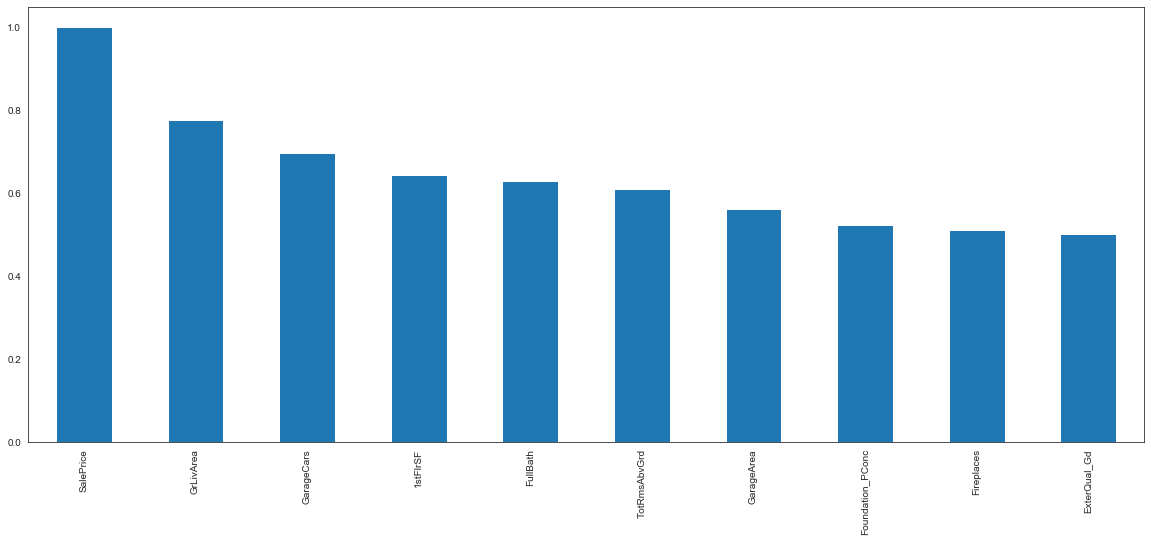

In [66]:
plt.figure(figsize=(20,8))
df_train.corr().nlargest(10, 'SalePrice')['SalePrice'].sort_values(ascending = False).plot(kind='bar');

In [67]:
y_train = df_train.pop('SalePrice')
X_train = df_train

### Ridge Regression

In [68]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)                    # 50 Features are selected using RFE 
rfe.fit(X_train, y_train)

columns = list(X_train.columns[rfe.support_])
X_train_rfe = X_train[columns]

In [69]:
X_train_rfe.shape

(898, 50)

In [70]:
#params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4,5,6,7,8,9,10,20,50,100,500,1000]}
params = {'alpha': [0.0001,0.0002,0.0004,0.0006,0.0008, 0.001, 0.002, 0.004, 0.006, 0.008,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4,5,6,7,8,9,10,20,50,100,500,1000]}

ridge = Ridge()

#cross Validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, 
                        scoring = 'neg_mean_absolute_error',cv = folds, return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0006, 0.0008,
                                   0.001, 0.002, 0.004, 0.006, 0.008, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4, 5, 6, 7, 8, 9, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008461,0.001142,0.003695,0.000584,0.0001,{'alpha': 0.0001},-0.033574,-0.036100,-0.036611,-0.035570,-0.031279,-0.034627,0.001966,14,-0.030725,-0.029682,-0.030459,-0.030905,-0.031457,-0.030646,0.000582
1,0.007941,0.000856,0.003523,0.000507,0.0002,{'alpha': 0.0002},-0.033572,-0.036100,-0.036610,-0.035570,-0.031278,-0.034626,0.001966,13,-0.030725,-0.029682,-0.030459,-0.030905,-0.031457,-0.030646,0.000582
2,0.009640,0.000766,0.004005,0.000890,0.0004,{'alpha': 0.0004},-0.033570,-0.036100,-0.036609,-0.035568,-0.031278,-0.034625,0.001966,12,-0.030725,-0.029682,-0.030459,-0.030906,-0.031457,-0.030646,0.000582
3,0.007858,0.001517,0.003957,0.000065,0.0006,{'alpha': 0.0006},-0.033567,-0.036100,-0.036608,-0.035567,-0.031277,-0.034624,0.001966,11,-0.030726,-0.029682,-0.030459,-0.030906,-0.031456,-0.030646,0.000582
4,0.009887,0.001690,0.003494,0.000444,0.0008,{'alpha': 0.0008},-0.033564,-0.036101,-0.036606,-0.035566,-0.031277,-0.034623,0.001966,10,-0.030726,-0.029682,-0.030459,-0.030906,-0.031456,-0.030646,0.000582
5,0.007280,0.001246,0.003405,0.000504,0.001,{'alpha': 0.001},-0.033562,-0.036101,-0.036605,-0.035564,-0.031276,-0.034622,0.001966,9,-0.030727,-0.029682,-0.030459,-0.030906,-0.031456,-0.030646,0.000582
6,0.009470,0.001417,0.004185,0.000392,0.002,{'alpha': 0.002},-0.033551,-0.036103,-0.036598,-0.035558,-0.031273,-0.034617,0.001966,8,-0.030729,-0.029683,-0.030459,-0.030907,-0.031455,-0.030647,0.000582
7,0.008183,0.001155,0.003338,0.000995,0.004,{'alpha': 0.004},-0.033534,-0.036106,-0.036585,-0.035545,-0.031268,-0.034607,0.001967,7,-0.030735,-0.029683,-0.030458,-0.030908,-0.031455,-0.030648,0.000582
8,0.007979,0.000817,0.003811,0.000776,0.006,{'alpha': 0.006},-0.033516,-0.036109,-0.036573,-0.035532,-0.031262,-0.034598,0.001967,6,-0.030740,-0.029684,-0.030458,-0.030910,-0.031454,-0.030649,0.000582
9,0.009240,0.000803,0.004297,0.000409,0.008,{'alpha': 0.008},-0.033499,-0.036118,-0.036560,-0.035520,-0.031256,-0.034591,0.001969,5,-0.030745,-0.029685,-0.030458,-0.030912,-0.031454,-0.030651,0.000582


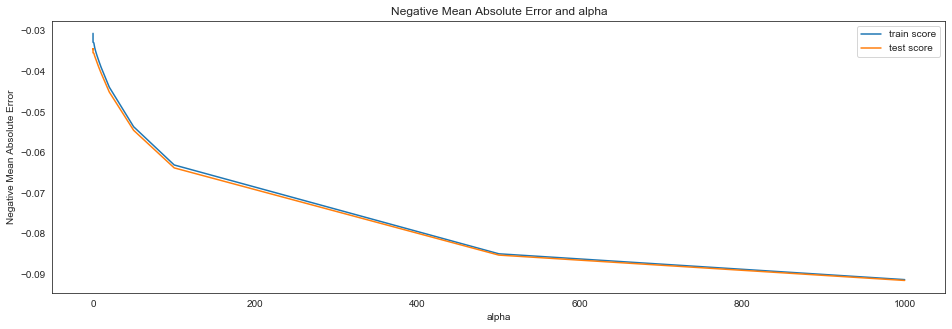

In [72]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize = (16,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [73]:
print(model_cv.best_params_)

{'alpha': 0.1}


##### Fitting the model with the alpha value = 0.1

In [74]:
alpha = 0.1

ridge = Ridge(alpha = alpha)

ridge.fit(X_train_rfe,y_train)

print(ridge.coef_)

y_pred_train = ridge.predict(X_train_rfe)

n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
r2 = r2_score(y_train, y_pred_train)
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))

print('\nR square for Training Data :',r2)

print('\nAdjusted R square for Training Data :',adjusted_r2)

[ 0.06378492  0.34125443 -0.08449768 -0.02038856  0.53446522  0.06899842
 -0.09906653  0.20037351  0.02433135  0.19436568  0.16252044  0.18141282
  0.15164856 -0.09959465  0.05050712  0.06426819  0.05611369  0.0617873
  0.04906793  0.07181143 -0.25601476  0.02433135  0.12332143 -0.03612847
  0.05767861  0.14967189 -0.05586232  0.04441094 -0.08808173  0.04553041
  0.15520325  0.04517889 -0.18015007 -0.02549462 -0.02549462  0.04219562
 -0.06818803  0.06373231  0.06373231 -0.0898834   0.06373231 -0.09044435
 -0.13541381 -0.19107531  0.03047002  0.03047002 -0.02463736  0.03047002
  0.04543947  0.06424628]

R square for Training Data : 0.8931596761995532

Adjusted R square for Training Data : 0.8868526913234938


In [75]:
variables = pd.DataFrame(ridge.coef_, X_train_rfe.columns, columns=['Coefficient'])
print(variables)
y = variables.apply(lambda x: abs(x))
print('\nTop 5 predictor variables :',list(y.sort_values(by = 'Coefficient',ascending = False)[0:5].index))

                           Coefficient
LotArea                       0.063785
TotalBsmtSF                   0.341254
1stFlrSF                     -0.084498
2ndFlrSF                     -0.020389
GrLivArea                     0.534465
FullBath                      0.068998
BedroomAbvGr                 -0.099067
GarageArea                    0.200374
MSSubClass_MSSubClass90       0.024331
MSZoning_FV                   0.194366
MSZoning_RH                   0.162520
MSZoning_RL                   0.181413
MSZoning_RM                   0.151649
LandSlope_Sev                -0.099595
Condition1_Feedr              0.050507
Condition1_Norm               0.064268
Condition1_PosA               0.056114
Condition1_PosN               0.061787
Condition1_RRAn               0.049068
Condition1_RRNn               0.071811
Condition2_PosN              -0.256015
BldgType_Duplex               0.024331
OverallQual_Excellent         0.123321
OverallQual_Fair             -0.036128
OverallQual_Very Good    

### Residual Analysis


 mu = 33.96 and sigma = 2.44



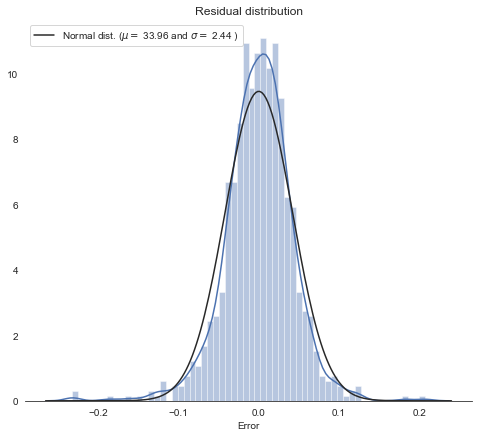

In [76]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot((y_train - y_pred_train), bins = 60 ,fit = norm, color="b");

(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

ax.xaxis.grid(False)
#ax.set(ylabel="Frequency")
ax.set(xlabel="Error")
ax.set(title="Residual distribution")
sns.despine(trim=False, left=True)

plt.show()

###### Observation: Residuals are Normally Distributed

###### To check the Homoscedasticity

<Figure size 432x288 with 0 Axes>

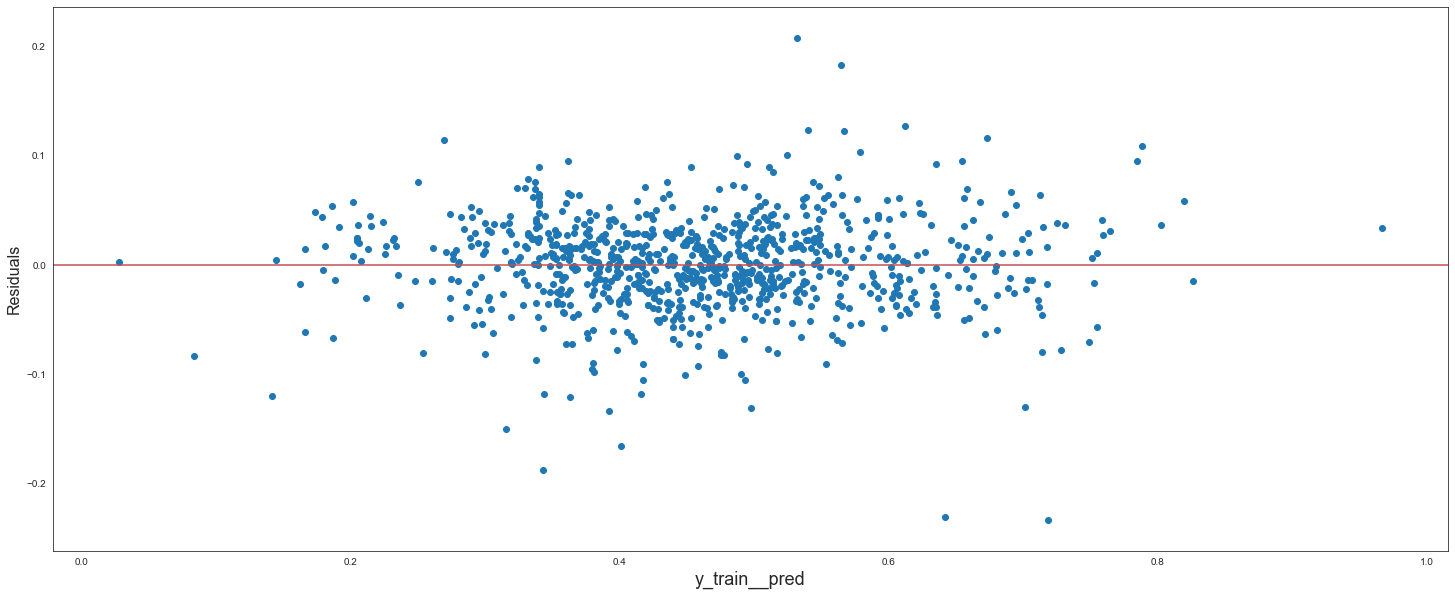

In [77]:
x = (y_train - y_pred_train)
fig = plt.figure()
plt.subplots(figsize = (25,10))
plt.scatter(y_pred_train,x)
fig.suptitle('y_train_pred vs Residual', fontsize=20)              # Plot heading 
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_train__pred', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.show()

##### Observation : Residuals have Constant Variance hence it follows the principle of homogeneity

###### Independence of Residuals

<Figure size 432x288 with 0 Axes>

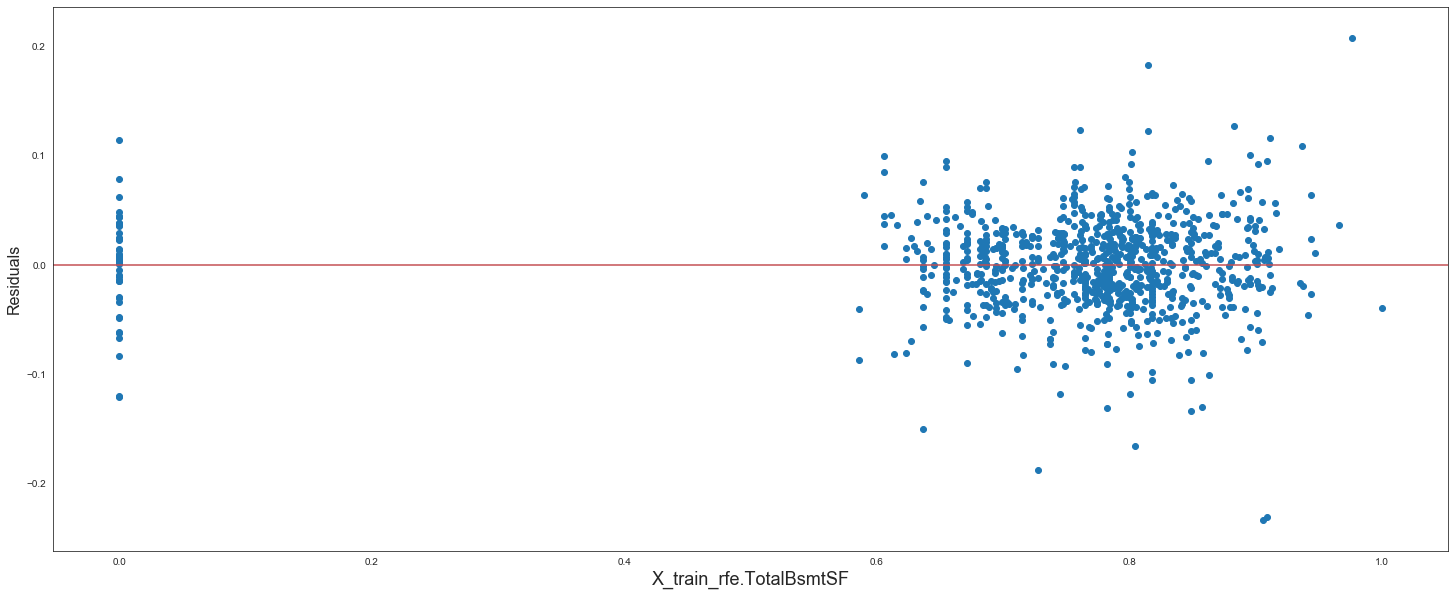

In [78]:
fig = plt.figure()
plt.subplots(figsize = (25,10))
plt.scatter(X_train_rfe.GarageArea,x)
fig.suptitle('X_train_rfe.TotalBsmtSF vs Residuals', fontsize=20)              # Plot heading 
plt.xlabel('X_train_rfe.TotalBsmtSF', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### Evaluation Metrics Using Ridge Regression

In [79]:
df_test[Numerical] = scaler.transform(df_test[Numerical])
y_test = df_test.SalePrice
X_test = df_test.loc[:,df_test.columns != 'SalePrice']
X_test_rfe = X_test[columns]

###### R^2 Score

In [80]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('Training DataSet R Square Score in % :',round(100*r2_train,2),'%')
print('Testing DataSet R Square Score in % :',round(100*r2_test,2),'%')

Training DataSet R Square Score in % : 89.32 %
Testing DataSet R Square Score in % : 86.59 %


###### Adjusted R^2 Score

In [81]:
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adjusted_r2 = 1 - (((1 - r2_test) * (n - 1))/(n - p - 1))
print('Testing Dataset Adjusted R Square in % :',round(100*adjusted_r2,2),'%')

Testing Dataset Adjusted R Square in % : 84.59 %


In [82]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred_test))
print('RSS :',rss)
mse = mean_squared_error(y_test, y_pred_test)
print('MSE :',mse)
rmse = mse**0.5
print('RSME:',rmse)

RSS : 0.8966433452260545
MSE : 0.002322910220792887
RSME: 0.04819657893246041


Text(0, 0.5, 'y_pred_test')

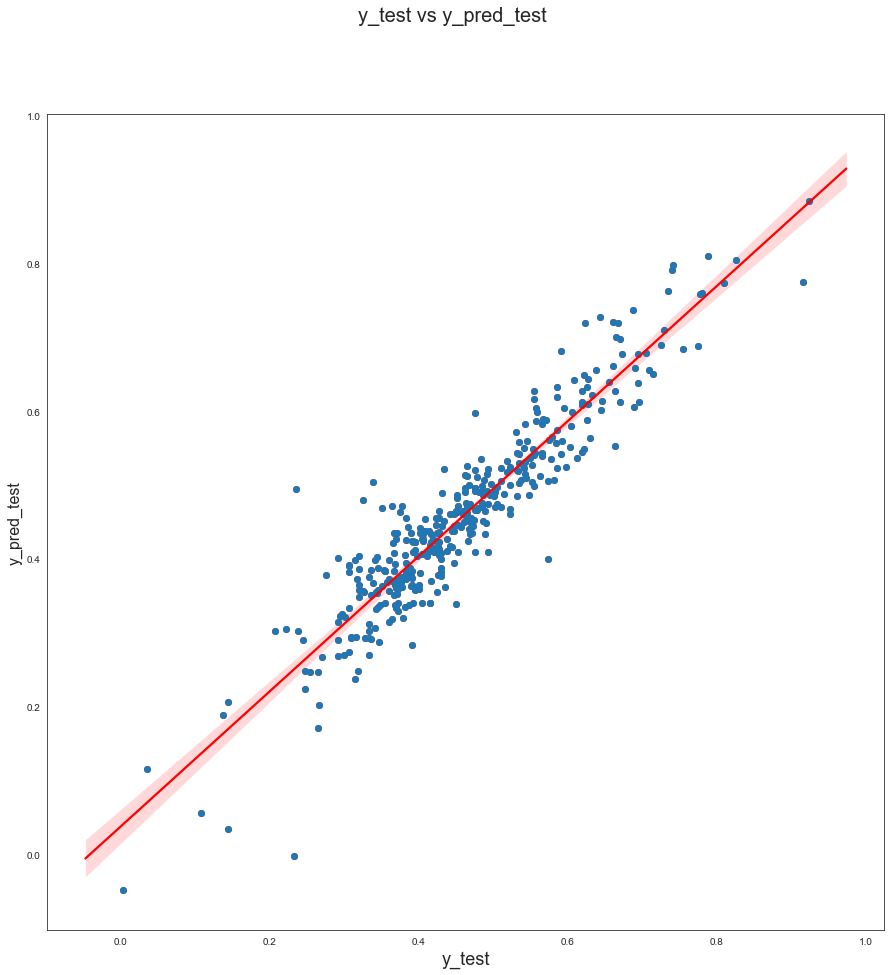

In [83]:
fig = plt.figure(figsize = (15,15))
sns.regplot(x=y_test, y=y_pred_test, color = 'Red')
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)    

### Lasso Regression

In [84]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train, y_train)

columns = list(X_train.columns[rfe.support_])
X_train_rfe = X_train[columns]
X_test_rfe = X_test[columns]

In [85]:
X_train_rfe.shape

(898, 50)

In [86]:
lasso = Lasso()
params = {'alpha': [0.00001,0.0001,0.0002,0.0004,0.0006,0.0008, 0.001, 0.002, 0.004, 0.006, 0.008,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4,5,6,7,8,9,10,20,50,100,500,1000]}

model_cv = GridSearchCV(estimator = lasso, param_grid = params, 
                        scoring = 'neg_mean_absolute_error',cv = 5, return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0004, 0.0006,
                                   0.0008, 0.001, 0.002, 0.004, 0.006, 0.008,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4, 5, 6, 7, 8, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [87]:
print(model_cv.best_params_)

{'alpha': 1e-05}


In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049264,0.012553,0.003865,5.275598e-04,1e-05,{'alpha': 1e-05},-0.033486,-0.036381,-0.036462,-0.035460,-0.031132,-0.034584,0.002032,1,-0.030825,-0.029790,-0.030533,-0.030979,-0.031535,-0.030732,0.000573
1,0.020186,0.004854,0.004305,8.276623e-04,0.0001,{'alpha': 0.0001},-0.033910,-0.038255,-0.036172,-0.036861,-0.030850,-0.035210,0.002593,2,-0.032567,-0.031161,-0.032466,-0.032090,-0.033552,-0.032367,0.000773
2,0.015116,0.003466,0.004228,7.287712e-04,0.0002,{'alpha': 0.0002},-0.034085,-0.039164,-0.036765,-0.037992,-0.031608,-0.035923,0.002738,3,-0.034159,-0.032683,-0.033831,-0.033260,-0.035309,-0.033848,0.000887
3,0.011461,0.002591,0.003689,5.749982e-04,0.0004,{'alpha': 0.0004},-0.034832,-0.040692,-0.038375,-0.039363,-0.034035,-0.037459,0.002590,4,-0.036665,-0.035061,-0.035534,-0.034915,-0.037579,-0.035951,0.001020
4,0.010208,0.001280,0.003789,3.982558e-04,0.0006,{'alpha': 0.0006},-0.036001,-0.041921,-0.039348,-0.040235,-0.034522,-0.038406,0.002737,5,-0.037821,-0.036220,-0.036847,-0.036042,-0.038261,-0.037038,0.000873
5,0.010859,0.000444,0.004387,7.966192e-04,0.0008,{'alpha': 0.0008},-0.036677,-0.043123,-0.039811,-0.040581,-0.035155,-0.039069,0.002839,6,-0.038396,-0.036929,-0.037531,-0.036707,-0.039031,-0.037719,0.000879
6,0.010707,0.000430,0.004034,6.476460e-04,0.001,{'alpha': 0.001},-0.037194,-0.044311,-0.040473,-0.040777,-0.035548,-0.039661,0.003051,7,-0.038990,-0.037534,-0.038257,-0.037267,-0.039659,-0.038341,0.000891
7,0.009887,0.000245,0.003930,1.535967e-04,0.002,{'alpha': 0.002},-0.039507,-0.049985,-0.044251,-0.042445,-0.038614,-0.042960,0.004052,8,-0.042076,-0.041112,-0.041618,-0.041131,-0.043571,-0.041902,0.000907
8,0.009276,0.000946,0.004251,6.007357e-04,0.004,{'alpha': 0.004},-0.044833,-0.060643,-0.050619,-0.048475,-0.046115,-0.050137,0.005616,9,-0.049876,-0.048624,-0.048740,-0.048623,-0.051070,-0.049387,0.000965
9,0.009892,0.000389,0.004116,3.552972e-04,0.006,{'alpha': 0.006},-0.054294,-0.072431,-0.059132,-0.057164,-0.055257,-0.059656,0.006600,10,-0.058842,-0.058418,-0.057856,-0.057824,-0.060176,-0.058623,0.000864


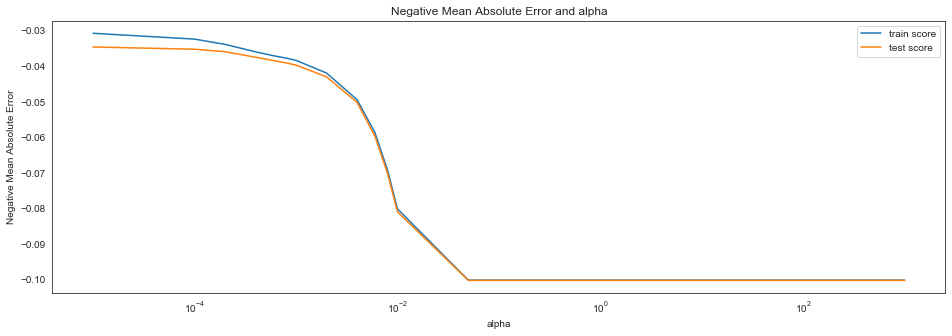

In [89]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize = (16,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [90]:
alpha = 0.00001           #0.0001

lasso = Lasso(alpha = alpha)

lasso.fit(X_train_rfe,y_train)

print(lasso.coef_)

y_pred_train = lasso.predict(X_train_rfe)

n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
r2 = r2_score(y_train, y_pred_train)
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))

print('\nR square for Training Data :',r2)

print('\nAdjusted R square for Training Data :',adjusted_r2)

[ 6.41636988e-02  3.69110999e-01 -1.55237974e-01 -4.28747185e-02
  6.28011790e-01  6.26440889e-02 -1.03078011e-01  1.94593011e-01
  3.52019534e-02  2.09760053e-01  1.78045361e-01  1.96778338e-01
  1.67841841e-01 -1.06381988e-01  4.99134989e-02  6.29907798e-02
  5.35041240e-02  6.24308893e-02  4.76038942e-02  6.92659910e-02
 -2.69836846e-01  1.05898956e-02  1.21863231e-01 -3.49930081e-02
  5.65185499e-02  1.51785371e-01 -5.45103971e-02  4.31957880e-02
 -8.70024784e-02 -0.00000000e+00  1.69458970e-01  3.95523364e-02
 -1.91765556e-01 -4.48313578e-02 -0.00000000e+00  3.15113498e-02
 -5.86582289e-02  2.11795564e-01  0.00000000e+00 -3.66853702e-02
  1.53955519e-04 -9.04166169e-02 -1.94700231e-01 -1.98587711e-01
  8.89925378e-02  7.78165346e-15 -2.50068780e-02  4.09922885e-07
  4.59046442e-02  5.77825583e-02]

R square for Training Data : 0.8939043970198269

Adjusted R square for Training Data : 0.8876413744117884


In [91]:
variables = pd.DataFrame(lasso.coef_, X_train_rfe.columns, columns=['Coefficient'])
print(variables)#[variables.Coefficient])
y = variables.apply(lambda x: abs(x))
print('\nTop 5 predictor variables :',list(y.sort_values(by = 'Coefficient',ascending = False)[0:5].index))

                            Coefficient
LotArea                    6.416370e-02
TotalBsmtSF                3.691110e-01
1stFlrSF                  -1.552380e-01
2ndFlrSF                  -4.287472e-02
GrLivArea                  6.280118e-01
FullBath                   6.264409e-02
BedroomAbvGr              -1.030780e-01
GarageArea                 1.945930e-01
MSSubClass_MSSubClass90    3.520195e-02
MSZoning_FV                2.097601e-01
MSZoning_RH                1.780454e-01
MSZoning_RL                1.967783e-01
MSZoning_RM                1.678418e-01
LandSlope_Sev             -1.063820e-01
Condition1_Feedr           4.991350e-02
Condition1_Norm            6.299078e-02
Condition1_PosA            5.350412e-02
Condition1_PosN            6.243089e-02
Condition1_RRAn            4.760389e-02
Condition1_RRNn            6.926599e-02
Condition2_PosN           -2.698368e-01
BldgType_Duplex            1.058990e-02
OverallQual_Excellent      1.218632e-01
OverallQual_Fair          -3.499301e-02


### Residual Analysis


 mu = 33.96 and sigma = 2.44



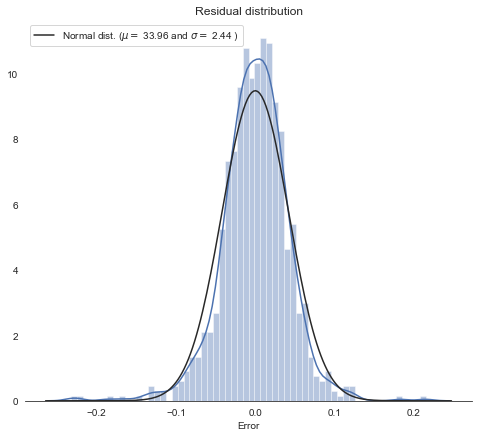

In [92]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot((y_train - y_pred_train), bins = 60 ,fit = norm, color="b");

(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

ax.xaxis.grid(False)
#ax.set(ylabel="Frequency")
ax.set(xlabel="Error")
ax.set(title="Residual distribution")
sns.despine(trim=False, left=True)

plt.show()

###### Observation: Residuals are Normally Distributed

###### To check the Homoscedasticity

<Figure size 432x288 with 0 Axes>

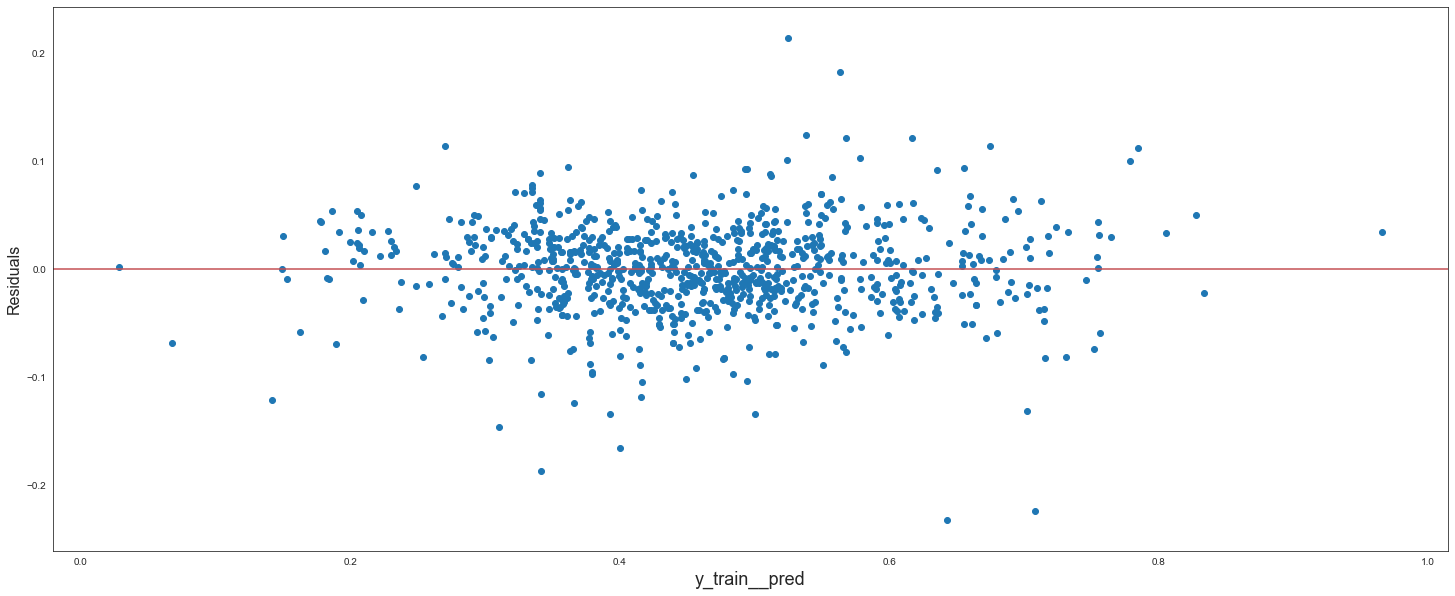

In [93]:
x = (y_train - y_pred_train)
fig = plt.figure()
plt.subplots(figsize = (25,10))
plt.scatter(y_pred_train,x)
fig.suptitle('y_train_pred vs Residual', fontsize=20)              # Plot heading 
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_train__pred', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.show()

##### Observation : Residuals have Constant Variance hence it follows the principle of homogeneity

###### Independence of Residuals

<Figure size 432x288 with 0 Axes>

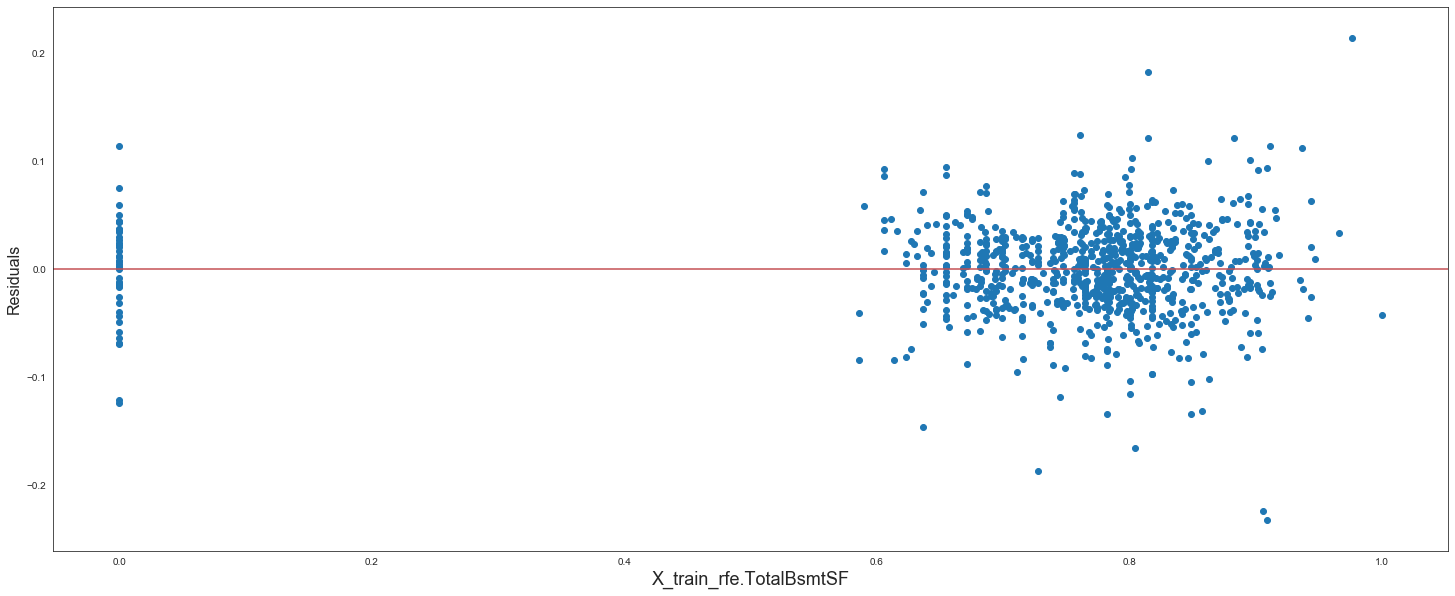

In [94]:
fig = plt.figure()
plt.subplots(figsize = (25,10))
plt.scatter(X_train_rfe.GarageArea,x)
fig.suptitle('X_train_rfe.TotalBsmtSF vs Residuals', fontsize=20)              # Plot heading 
plt.xlabel('X_train_rfe.TotalBsmtSF', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

###### Observation : Looks like the residuals are independent of eachother

### Evaluation Metrics Using Lasso Regression

###### R^2 Score

In [95]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('Training DataSet R Square Score in % :',round(100*r2_train,2),'%')
print('Testing DataSet R Square Score in % :',round(100*r2_test,2),'%')

Training DataSet R Square Score in % : 89.39 %
Testing DataSet R Square Score in % : 86.42 %


###### Adjusted R^2 Score

In [96]:
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adjusted_r2 = 1 - (((1 - r2_test) * (n - 1))/(n - p - 1))
print('Testing Dataset Adjusted R Square in % :',round(100*adjusted_r2,2),'%')

Testing Dataset Adjusted R Square in % : 84.39 %


In [97]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred_test))
print('RSS :',rss)
mse = mean_squared_error(y_test, y_pred_test)
print('MSE :',mse)
rmse = mse**0.5
print('RSME:',rmse)

RSS : 0.9080147123569462
MSE : 0.002352369721131985
RSME: 0.04850123422276989


Text(0, 0.5, 'y_pred_test')

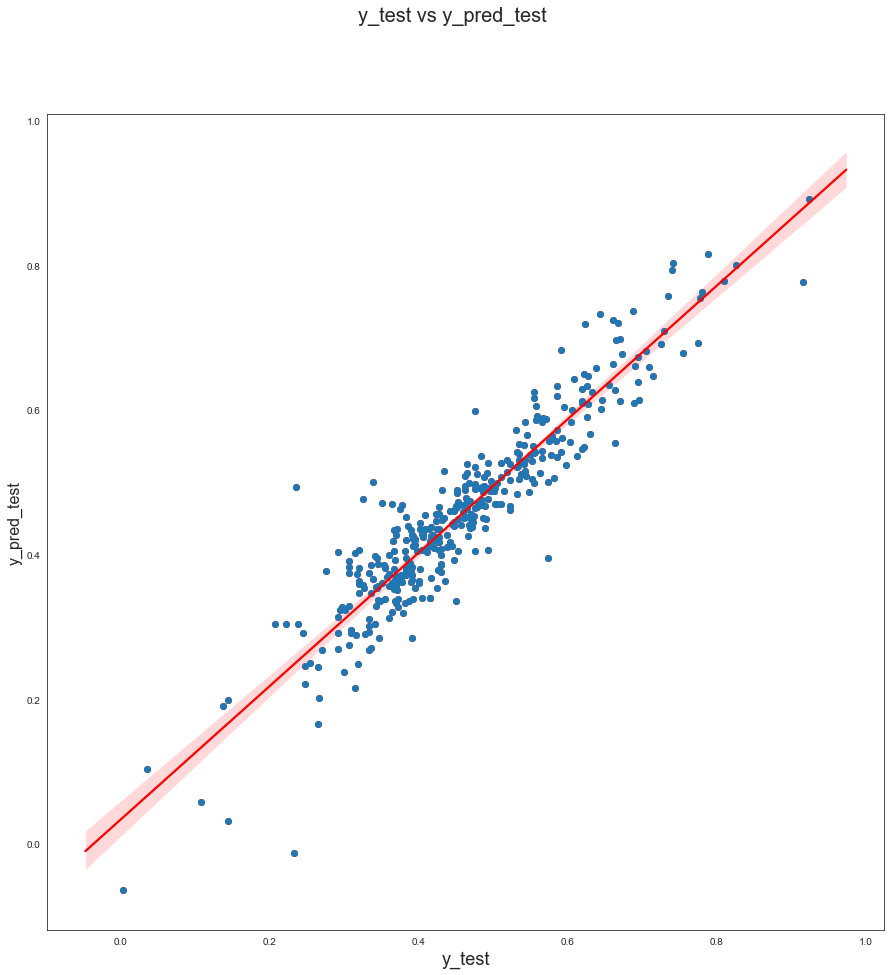

In [98]:
fig = plt.figure(figsize = (15,15))
sns.regplot(x=y_test, y=y_pred_test, color = 'Red')
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)       

## Insights

### Ridge
##### Final Coefficients : Ridge Regression


- LotArea :                      0.063785
- TotalBsmtSF :                    0.341254
- 1stFlrSF  :                     -0.084498
- 2ndFlrSF  :                      -0.020389
- GrLivArea :                      0.534465
- FullBath  :                      0.068998
- BedroomAbvGr  :                  -0.099067
- GarageArea :                     0.200374
- MSSubClass_MSSubClass90 :        0.024331
- MSZoning_FV     :                0.194366
- MSZoning_RH   :                  0.162520
- MSZoning_RL    :                 0.181413
- MSZoning_RM   :                  0.151649
- LandSlope_Sev   :               -0.099595
- Condition1_Feedr     :           0.050507
- Condition1_Norm   :              0.064268
- Condition1_PosA    :             0.056114
- Condition1_PosN   :              0.061787
- Condition1_RRAn   :              0.049068
- Condition1_RRNn   :              0.071811
- Condition2_PosN  :              -0.256015
- BldgType_Duplex    :             0.024331
- OverallQual_Excellent   :        0.123321
- OverallQual_Fair  :             -0.036128
- OverallQual_Very Good  :         0.057679
- OverallQual_VeryExcellent  :     0.149672
- OverallCond_BelowAverage :      -0.055862
- OverallCond_Excellent  :         0.044411
- OverallCond_Fair     :          -0.088082
- OverallCond_VeryPoor  :          0.045530
- RoofStyle_Shed    :              0.155203
- RoofMatl_WdShngl    :            0.045179
- Exterior1st_BrkComm   :         -0.180150
- Exterior1st_CBlock    :         -0.025495
- Exterior2nd_CBlock   :          -0.025495
- Foundation_Stone    :            0.042196
- Foundation_Wood    :            -0.068188
- BsmtQual_None    :               0.063732
- BsmtCond_None    :               0.063732
- BsmtCond_Po     :               -0.089883
- BsmtFinType1_None  :             0.063732
- Heating_Grav     :              -0.090444
- Electrical_Mix    :             -0.135414
- Functional_Sev     :            -0.191075
- GarageFinish_None   :            0.030470
- GarageQual_None   :              0.030470
- GarageCond_Fa    :              -0.024637
- GarageCond_None   :              0.030470
- GarageCond_Po    :               0.045439
- SaleType_Con    :                0.064246

##### Final Report  for Ridge Regression: Performance
- Train R-Square :  89.32 %
- Train Adj R- Square : 88.69 %
- Test R- Square : 86.59 %
- Test Adj R- Square : 84.59 %
- RSS : 0.8966433452260545
- MSE : 0.002322910220792887
- RSME: 0.04819657893246041

###### This seems to be a good model for 50 features ,based on the performance on the test data

###### As per the final Ridge Model the top five predictors are :
- GrLivArea	: 0.534465
- TotalBsmtSF : 0.341254
- Condition2_PosN : -0.256015
- GarageArea : 0.200374
- MSZoning_FV : 0.194366

### lasso

##### Final Coefficients : Lasso Regression
- LotArea                    6.416370e-02
- TotalBsmtSF                3.691110e-01
- 1stFlrSF                  -1.552380e-01
- 2ndFlrSF                  -4.287472e-02
- GrLivArea                  6.280118e-01
- FullBath                   6.264409e-02
- BedroomAbvGr              -1.030780e-01
- GarageArea                 1.945930e-01
- MSSubClass_MSSubClass90    3.520195e-02
- MSZoning_FV                2.097601e-01
- MSZoning_RH                1.780454e-01
- MSZoning_RL                1.967783e-01
- MSZoning_RM                1.678418e-01
- LandSlope_Sev             -1.063820e-01
- Condition1_Feedr           4.991350e-02
- Condition1_Norm            6.299078e-02
- Condition1_PosA            5.350412e-02
- Condition1_PosN            6.243089e-02
- Condition1_RRAn            4.760389e-02
- Condition1_RRNn            6.926599e-02
- Condition2_PosN           -2.698368e-01
- BldgType_Duplex            1.058990e-02
- OverallQual_Excellent      1.218632e-01
- OverallQual_Fair          -3.499301e-02
- OverallQual_Very Good      5.651855e-02
- OverallQual_VeryExcellent  1.517854e-01
- OverallCond_BelowAverage  -5.451040e-02
- OverallCond_Excellent      4.319579e-02
- OverallCond_Fair          -8.700248e-02
- OverallCond_VeryPoor      -0.000000e+00
- RoofStyle_Shed             1.694590e-01
- RoofMatl_WdShngl           3.955234e-02
- Exterior1st_BrkComm       -1.917656e-01
- Exterior1st_CBlock        -4.483136e-02
- Exterior2nd_CBlock        -0.000000e+00
- Foundation_Stone           3.151135e-02
- Foundation_Wood           -5.865823e-02
- BsmtQual_None              2.117956e-01
- BsmtCond_None              0.000000e+00
- BsmtCond_Po               -3.668537e-02
- BsmtFinType1_None          1.539555e-04
- Heating_Grav              -9.041662e-02
- Electrical_Mix            -1.947002e-01
- Functional_Sev            -1.985877e-01
- GarageFinish_None          8.899254e-02
- GarageQual_None            7.781653e-15 
- GarageCond_Fa             -2.500688e-02
- GarageCond_None            4.099229e-07
- GarageCond_Po              4.590464e-02
- SaleType_Con               5.778256e-02

##### Final Report  for Lasso Regression: Performance
- Train R-Square :  89.32 %
- Train Adj R- Square : 88.76 %
- Test R- Square : 86.42 %
- Test Adj R- Square : 84.39 %
- RSS : 0.9080147123569462
- MSE : 0.002352369721131985
- RSME: 0.04850123422276989

###### As per the final Lasso Model the top five predictors are :
- GrLivArea :	0.628012
- TotalBsmtSF :	0.369111
- Condition2_PosN :	-0.269837
- BsmtQual_None :	0.211796
- MSZoning_FV :	0.209760

##### It is suggested to consider these variables utmost importance while planning, to achive maximum Sales Price

## Subjective Questions

##### Subjective Question 1

In [99]:
alpha = 0.2

ridge_double = Ridge(alpha = alpha)

ridge_double.fit(X_train_rfe,y_train)

print(ridge_double.coef_)

y_pred_train_double = ridge_double.predict(X_train_rfe)

n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
r2 = r2_score(y_train, y_pred_train_double)
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))

print('\nR square for Training Data :',r2)

print('\nAdjusted R square for Training Data :',adjusted_r2)

[ 0.06208444  0.30741534 -0.02436194 -0.00337882  0.46268751  0.07421731
 -0.0949226   0.20025806  0.02395592  0.1697104   0.13684258  0.15678819
  0.12605127 -0.08978853  0.04934413  0.06372593  0.05465435  0.05746262
  0.04828675  0.06818649 -0.23594976  0.02395592  0.12475306 -0.03669972
  0.05886206  0.14633122 -0.0572202   0.04459358 -0.08842512  0.03317561
  0.13490496  0.04657812 -0.16403684 -0.0249004  -0.0249004   0.04329692
 -0.06844583  0.05520236  0.05520236 -0.08583444  0.05520236 -0.08514397
 -0.11901006 -0.17699875  0.02970802  0.02970802 -0.02410141  0.02970802
  0.03614046  0.06148406]

R square for Training Data : 0.8914713072786337

Adjusted R square for Training Data : 0.885064654815743


In [100]:
variables = pd.DataFrame(ridge_double.coef_, X_train_rfe.columns, columns=['Coefficient'])
#print(variables)
y = variables.apply(lambda x: abs(x))
y.sort_values(by = 'Coefficient',ascending = False)[0:10]

,Coefficient
GrLivArea,0.462688
TotalBsmtSF,0.307415
Condition2_PosN,0.235950
GarageArea,0.200258
Functional_Sev,0.176999
MSZoning_FV,0.169710
Exterior1st_BrkComm,0.164037
MSZoning_RL,0.156788
OverallQual_VeryExcellent,0.146331
MSZoning_RH,0.136843


In [101]:
alpha = 0.00002

lasso_double = Lasso(alpha = alpha)

lasso_double.fit(X_train_rfe,y_train)

print(lasso_double.coef_)

y_pred_train_double = lasso_double.predict(X_train_rfe)

n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
r2 = r2_score(y_train, y_pred_train_double)
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))

print('\nR square for Training Data :',r2)

print('\nAdjusted R square for Training Data :',adjusted_r2)

[ 6.19901322e-02  3.49406918e-01 -1.25100438e-01 -3.54509765e-02
  5.98208920e-01  6.41829404e-02 -1.01133802e-01  1.92673351e-01
  3.13176889e-02  1.90904544e-01  1.58041392e-01  1.77905459e-01
  1.48353726e-01 -9.91803344e-02  4.81687818e-02  6.14969130e-02
  4.97705879e-02  5.83103746e-02  4.57253434e-02  6.32524657e-02
 -2.60471482e-01  1.08146952e-02  1.22331760e-01 -3.47165772e-02
  5.68976533e-02  1.50182160e-01 -5.53079090e-02  4.25302859e-02
 -8.65883285e-02 -0.00000000e+00  1.53646909e-01  3.63684217e-02
 -1.83009425e-01 -3.77938515e-02 -0.00000000e+00  2.47763807e-02
 -5.30671940e-02  1.96661251e-01  0.00000000e+00 -4.21347393e-02
  1.21011592e-04 -8.37238002e-02 -1.68152056e-01 -1.90940677e-01
  8.61721190e-02  4.41772226e-15 -2.43782831e-02  1.15714387e-05
  3.42530877e-02  4.98272440e-02]

R square for Training Data : 0.8933107430885234

Adjusted R square for Training Data : 0.8870126759745047


In [102]:
variables = pd.DataFrame(lasso_double.coef_, X_train_rfe.columns, columns=['Coefficient'])
#print(variables)
y = variables.apply(lambda x: abs(x))
y.sort_values(by = 'Coefficient',ascending = False)[0:5]

,Coefficient
GrLivArea,0.598209
TotalBsmtSF,0.349407
Condition2_PosN,0.260471
BsmtQual_None,0.196661
GarageArea,0.192673


###### Observation: The performance would almost remain the same

###### Subjective question 3

In [103]:
alpha = 0.00001

lasso11 = Lasso(alpha = alpha)

lasso11.fit(X_train_rfe,y_train)

print(lasso11.coef_)

y_pred_train_double = lasso11.predict(X_train_rfe)

n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
r2 = r2_score(y_train, y_pred_train_double)
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))

print('\nR square for Training Data :',r2)

print('\nAdjusted R square for Training Data :',adjusted_r2)

[ 6.41636988e-02  3.69110999e-01 -1.55237974e-01 -4.28747185e-02
  6.28011790e-01  6.26440889e-02 -1.03078011e-01  1.94593011e-01
  3.52019534e-02  2.09760053e-01  1.78045361e-01  1.96778338e-01
  1.67841841e-01 -1.06381988e-01  4.99134989e-02  6.29907798e-02
  5.35041240e-02  6.24308893e-02  4.76038942e-02  6.92659910e-02
 -2.69836846e-01  1.05898956e-02  1.21863231e-01 -3.49930081e-02
  5.65185499e-02  1.51785371e-01 -5.45103971e-02  4.31957880e-02
 -8.70024784e-02 -0.00000000e+00  1.69458970e-01  3.95523364e-02
 -1.91765556e-01 -4.48313578e-02 -0.00000000e+00  3.15113498e-02
 -5.86582289e-02  2.11795564e-01  0.00000000e+00 -3.66853702e-02
  1.53955519e-04 -9.04166169e-02 -1.94700231e-01 -1.98587711e-01
  8.89925378e-02  7.78165346e-15 -2.50068780e-02  4.09922885e-07
  4.59046442e-02  5.77825583e-02]

R square for Training Data : 0.8939043970198269

Adjusted R square for Training Data : 0.8876413744117884


In [104]:
variables = pd.DataFrame(lasso11.coef_, X_train_rfe.columns, columns=['Coefficient'])
y = variables.apply(lambda x: abs(x))
top5 = list(y.sort_values(by = 'Coefficient',ascending = False)[0:5].index)
top5

['GrLivArea', 'TotalBsmtSF', 'Condition2_PosN', 'BsmtQual_None', 'MSZoning_FV']

In [105]:
X_train11 = X_train.drop(top5,axis = 1)
lm = LinearRegression()
lm.fit(X_train11,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train11, y_train)
columns11 = list(X_train11.columns[rfe.support_])
X_train_rfe_new = X_train11[columns11]

In [106]:
X_train_rfe_new = X_train_rfe.drop(top5,axis = 1)

In [107]:
alpha = 0.00001

lasso11 = Lasso(alpha = alpha)

lasso11.fit(X_train_rfe_new,y_train)

print(lasso11.coef_)

y_pred_train_double = lasso11.predict(X_train_rfe_new)

n = X_train_rfe_new.shape[0]
p = X_train_rfe_new.shape[1]
r2 = r2_score(y_train, y_pred_train_double)
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))

print('\nR square for Training Data :',r2)

print('\nAdjusted R square for Training Data :',adjusted_r2)

[ 5.52738084e-02  3.68114736e-01  1.01940907e-01  1.14455606e-01
 -6.54902236e-02  2.60818603e-01  2.98544749e-02 -1.35945605e-02
 -1.04441606e-03 -3.51308786e-02 -8.36503253e-02  5.05585744e-02
  7.08901623e-02  6.35405333e-02  2.45129009e-02  5.33507916e-02
  7.88550456e-02  1.45987590e-02  1.35722337e-01 -4.36281156e-02
  6.60388419e-02  1.16003333e-01 -6.72287059e-02  4.71680782e-02
 -8.71213196e-02 -0.00000000e+00  1.58962613e-01  7.85858644e-02
 -1.77775499e-01 -3.91868256e-02 -1.56299165e-17  7.27701319e-02
 -1.29228178e-01 -6.44998788e-02 -2.87332431e-02 -6.51547462e-05
 -8.23855631e-02 -1.86914743e-01 -2.21968313e-01  1.18305307e-01
  1.10610957e-15 -1.98947434e-02  1.67409633e-05  3.67040219e-02
  9.21105832e-02]

R square for Training Data : 0.8593562679070497

Adjusted R square for Training Data : 0.8519279017753798


In [108]:
variables = pd.DataFrame(lasso11.coef_, X_train_rfe_new.columns, columns=['Coefficient'])
y = variables.apply(lambda x: abs(x))
y.sort_values(by = 'Coefficient',ascending = False)[0:5]

,Coefficient
1stFlrSF,0.368115
GarageArea,0.260819
Functional_Sev,0.221968
Electrical_Mix,0.186915
Exterior1st_BrkComm,0.177775
